In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")
from google.colab import data_table

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Colab Notebooks/Machine Learning - 1/Project/PCA+India+Data_Census.xlsx'
DF = pd.read_excel(path)

Mounted at /content/drive


In [ ]:
data_table.enable_dataframe_formatter()

In [ ]:
data_table.DataTable(DF)

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,136,172,24,44,11,21,1,4,100,103


In [ ]:
from IPython.display import display, HTML
display(HTML('<style>.container { width:80% !important; }</style>'))

In [ ]:
DF.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [ ]:
DF.tail()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,136,172,24,44,11,21,1,4,100,103
639,35,640,Andaman & Nicobar Island,South Andaman,7975,11977,18049,1470,1358,0,...,173,122,6,2,17,17,2,4,148,99


In [ ]:
DF.shape

(640, 61)

In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

Observation:

There are 640 observations and 61 columns in the data.

All variables except State and area are of numeric data type.



In [ ]:
DF.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.11,9.43,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.50,184.90,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.87,48135.41,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.58,73384.51,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.08,113600.72,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.10,11500.91,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.30,11326.29,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.95,14426.37,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.39,21727.89,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.81,9912.67,0.0,293.75,2333.5,7658.00,96785.0


In [ ]:
data_table.disable_dataframe_formatter()

##Data Preprocessing and Exploratory Data Analysis

In [ ]:
DF["State"].nunique()

35

In [ ]:
DF["Area Name"].nunique()

635

In [ ]:
DF.duplicated().sum()

0

There are no duplicates rows

In [ ]:
# dropping some columns
data1 = DF.copy()
DF1 = DF[['State Code','Dist.Code','State','Area Name']].copy()
DF = DF.drop(['State Code','Dist.Code','State','Area Name'], axis=1)

In [ ]:
DF1.shape

(640, 4)

In [ ]:
DF.isnull().sum()

No_HH             0
TOT_M             0
TOT_F             0
M_06              0
F_06              0
M_SC              0
F_SC              0
M_ST              0
F_ST              0
M_LIT             0
F_LIT             0
M_ILL             0
F_ILL             0
TOT_WORK_M        0
TOT_WORK_F        0
MAINWORK_M        0
MAINWORK_F        0
MAIN_CL_M         0
MAIN_CL_F         0
MAIN_AL_M         0
MAIN_AL_F         0
MAIN_HH_M         0
MAIN_HH_F         0
MAIN_OT_M         0
MAIN_OT_F         0
MARGWORK_M        0
MARGWORK_F        0
MARG_CL_M         0
MARG_CL_F         0
MARG_AL_M         0
MARG_AL_F         0
MARG_HH_M         0
MARG_HH_F         0
MARG_OT_M         0
MARG_OT_F         0
MARGWORK_3_6_M    0
MARGWORK_3_6_F    0
MARG_CL_3_6_M     0
MARG_CL_3_6_F     0
MARG_AL_3_6_M     0
MARG_AL_3_6_F     0
MARG_HH_3_6_M     0
MARG_HH_3_6_F     0
MARG_OT_3_6_M     0
MARG_OT_3_6_F     0
MARGWORK_0_3_M    0
MARGWORK_0_3_F    0
MARG_CL_0_3_M     0
MARG_CL_0_3_F     0
MARG_AL_0_3_M     0


Observation:

There are no missing values

##Picking 5 variables out of the given 24 variables below for EDA

In [ ]:
DF_5 = DF[['No_HH','TOT_M','TOT_F','M_06','F_06']].copy()

In [ ]:
DF_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   No_HH   640 non-null    int64
 1   TOT_M   640 non-null    int64
 2   TOT_F   640 non-null    int64
 3   M_06    640 non-null    int64
 4   F_06    640 non-null    int64
dtypes: int64(5)
memory usage: 25.1 KB


##Univariate Analysis

Let us define a function 'univariateAnalysis_numeric' to display information as part of univariate analysis of numeric variables. The function will accept coulmn name and number of bins as arguments.

The function will display the statistical description of the the numeric variable, histogram or distplot to view the distribution and the box plot to view 5 point summary and outliers if any.

In [ ]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(DF_5[column].describe(),end=' ')


    plt.figure(figsize=[25,10])
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    a=round(DF_5[column].min())
    b=round(DF_5[column].max())
    freq, bins, patches = plt.hist(DF[column], bins=nbins, range=[a,b], edgecolor='Black', color='cyan')
    bin_centers = np.diff(bins)*0.5 + bins[:-1]
    n = 0
    for fr, x, patch in zip(freq, bin_centers, patches):
      height = int(freq[n])
      plt.annotate("{}".format(height),
               xy = (x, height),             # top left corner of the histogram bar
               xytext = (0,0.2),             # offsetting label position above its bar
               textcoords = "offset points", # Offset (in points) from the *xy* value
               ha = 'center', va = 'bottom'
               )
      n = n+1

    #plt.legend()
    #plt.xticks(range(a,b,round((b-a)/nbins)))
    plt.show;
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sn.boxplot(x=DF_5[column])
    #ax.legend()
    plt.show()

In [ ]:
lstnumericcolumns = list(DF_5.columns.values)
len(lstnumericcolumns)

5

In [ ]:
type(lstnumericcolumns)

list

In [ ]:
DF_5.head()

,No_HH,TOT_M,TOT_F,M_06,F_06
0,7707,23388,29796,5862,6196
1,6218,19585,23102,4482,3733
2,4452,6546,10964,1082,1018
3,1320,2784,4206,563,677
4,11654,20591,29981,5157,4587


Description of No_HH
----------------------------------------------------------------------------
count       640.000000
mean      51222.871875
std       48135.405475
min         350.000000
25%       19484.000000
50%       35837.000000
75%       68892.000000
max      310450.000000
Name: No_HH, dtype: float64 Distribution of No_HH
----------------------------------------------------------------------------
BoxPlot of No_HH
----------------------------------------------------------------------------


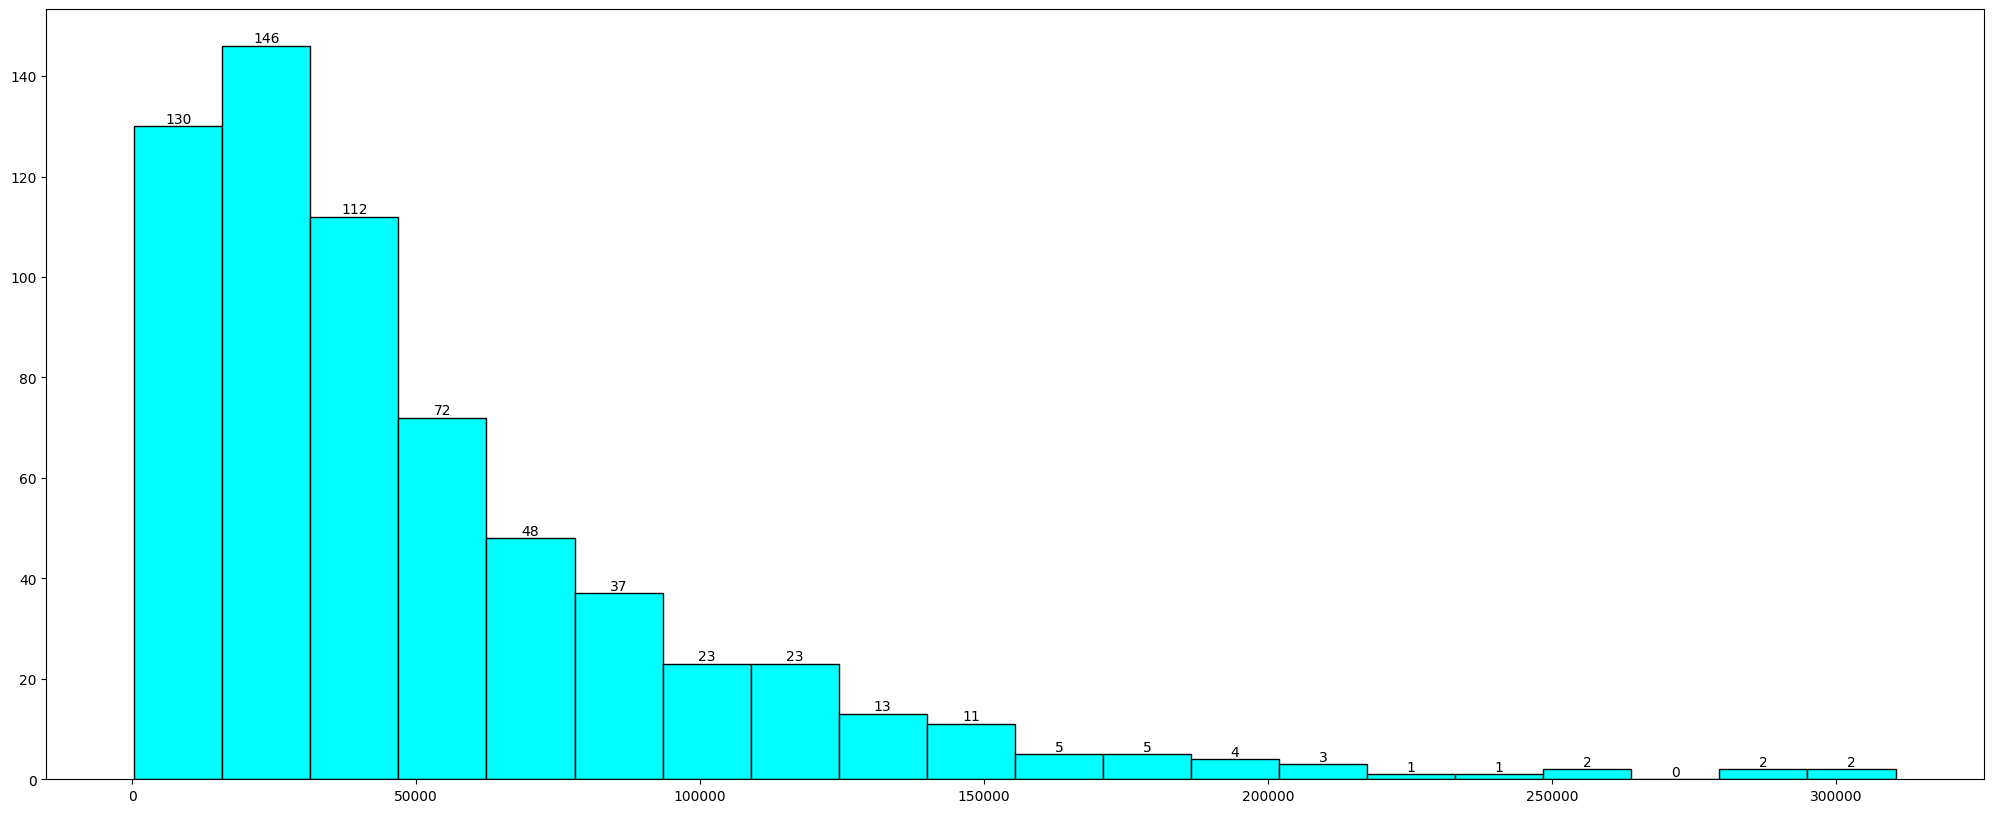

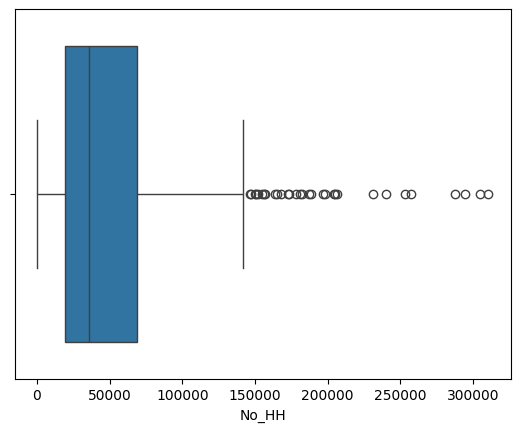

Description of TOT_M
----------------------------------------------------------------------------
count       640.000000
mean      79940.576563
std       73384.511114
min         391.000000
25%       30228.000000
50%       58339.000000
75%      107918.500000
max      485417.000000
Name: TOT_M, dtype: float64 Distribution of TOT_M
----------------------------------------------------------------------------
BoxPlot of TOT_M
----------------------------------------------------------------------------


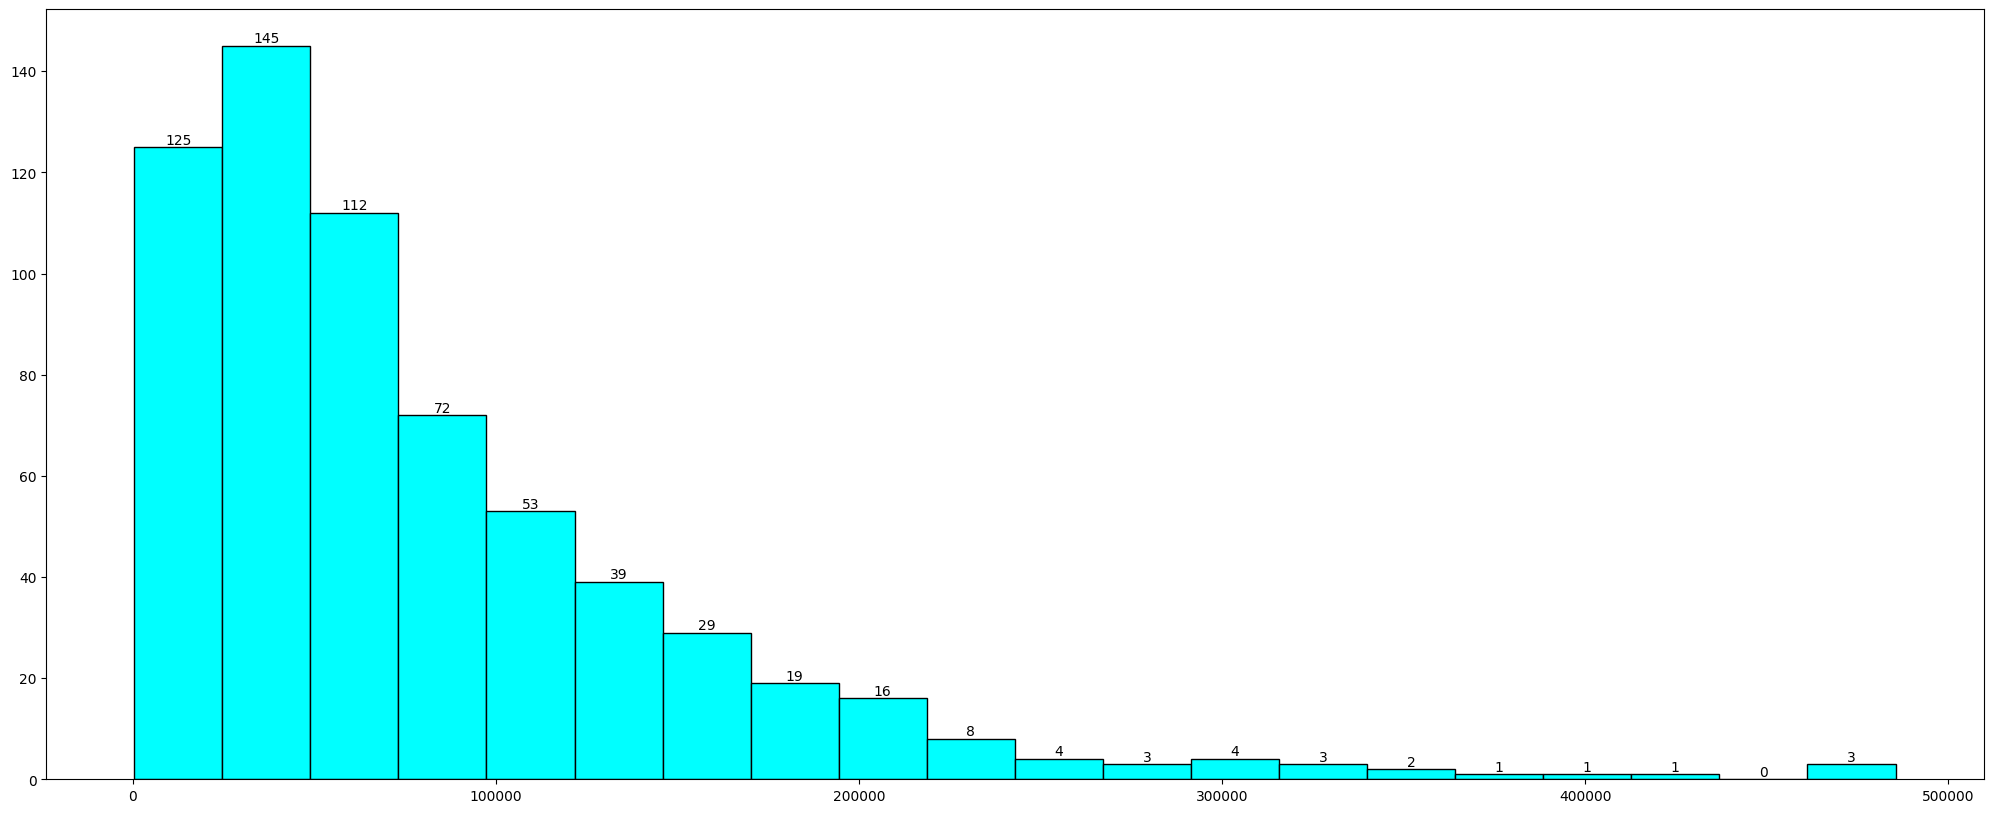

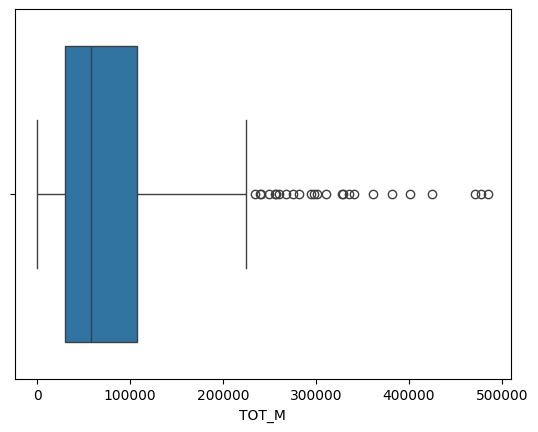

Description of TOT_F
----------------------------------------------------------------------------
count       640.000000
mean     122372.084375
std      113600.717282
min         698.000000
25%       46517.750000
50%       87724.500000
75%      164251.750000
max      750392.000000
Name: TOT_F, dtype: float64 Distribution of TOT_F
----------------------------------------------------------------------------
BoxPlot of TOT_F
----------------------------------------------------------------------------


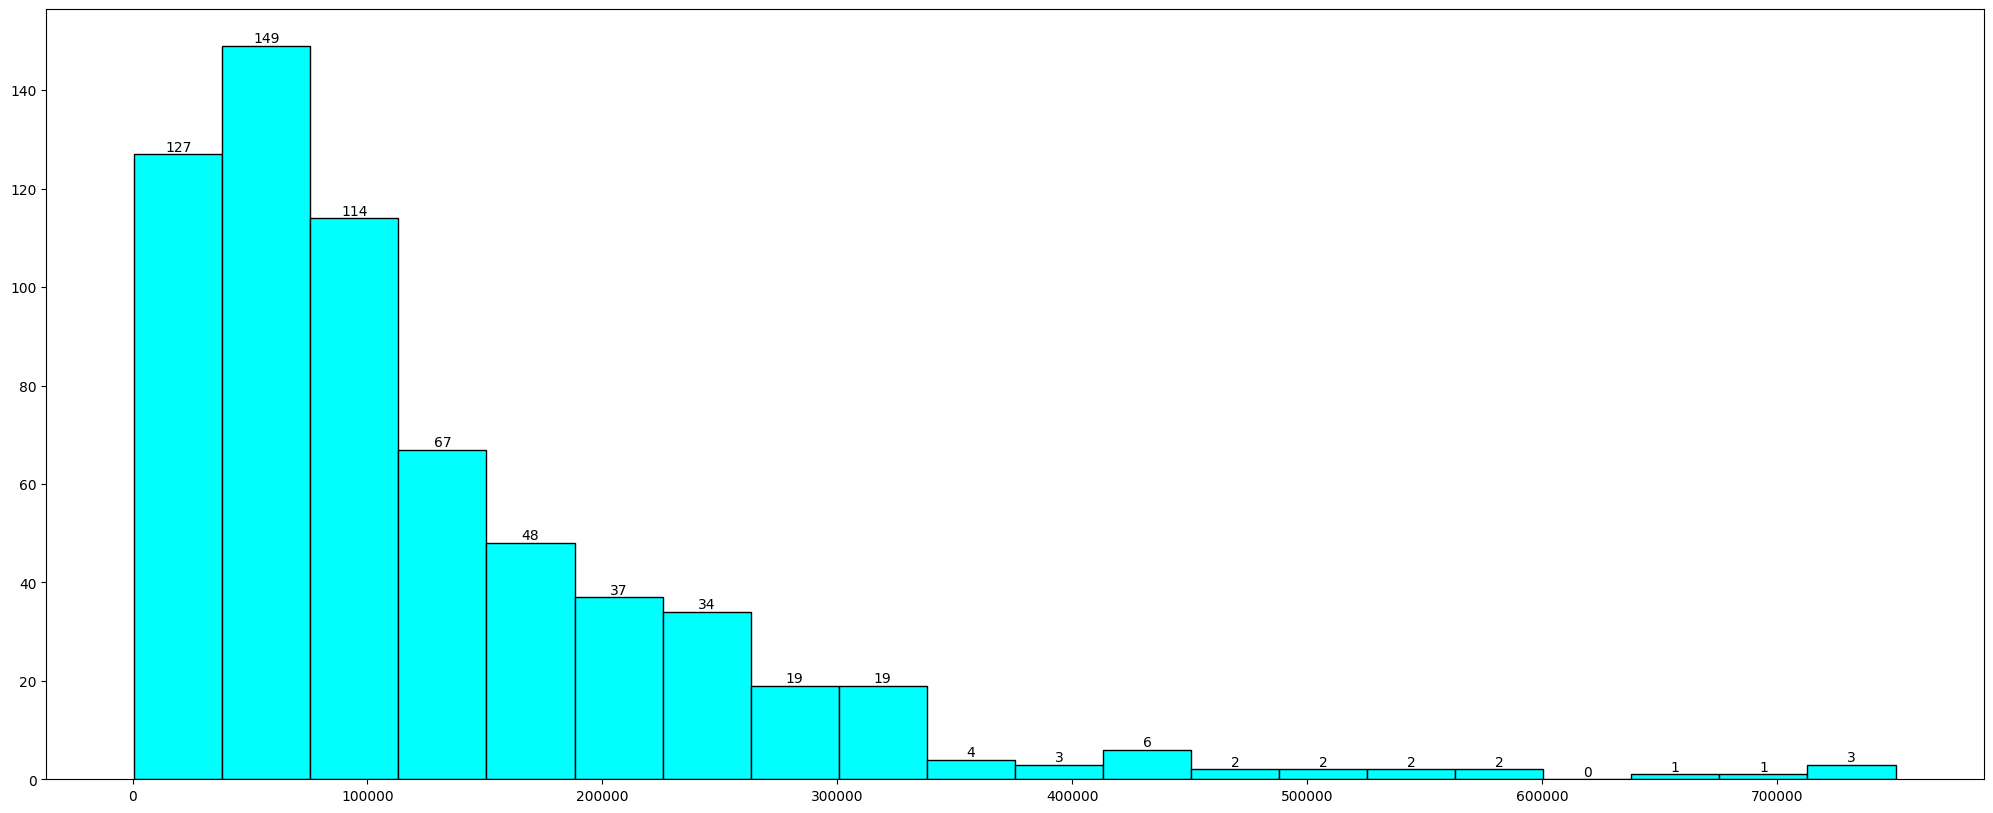

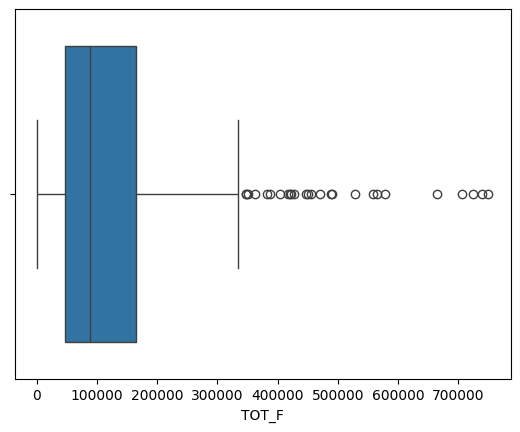

Description of M_06
----------------------------------------------------------------------------
count      640.000000
mean     12309.098438
std      11500.906881
min         56.000000
25%       4733.750000
50%       9159.000000
75%      16520.250000
max      96223.000000
Name: M_06, dtype: float64 Distribution of M_06
----------------------------------------------------------------------------
BoxPlot of M_06
----------------------------------------------------------------------------


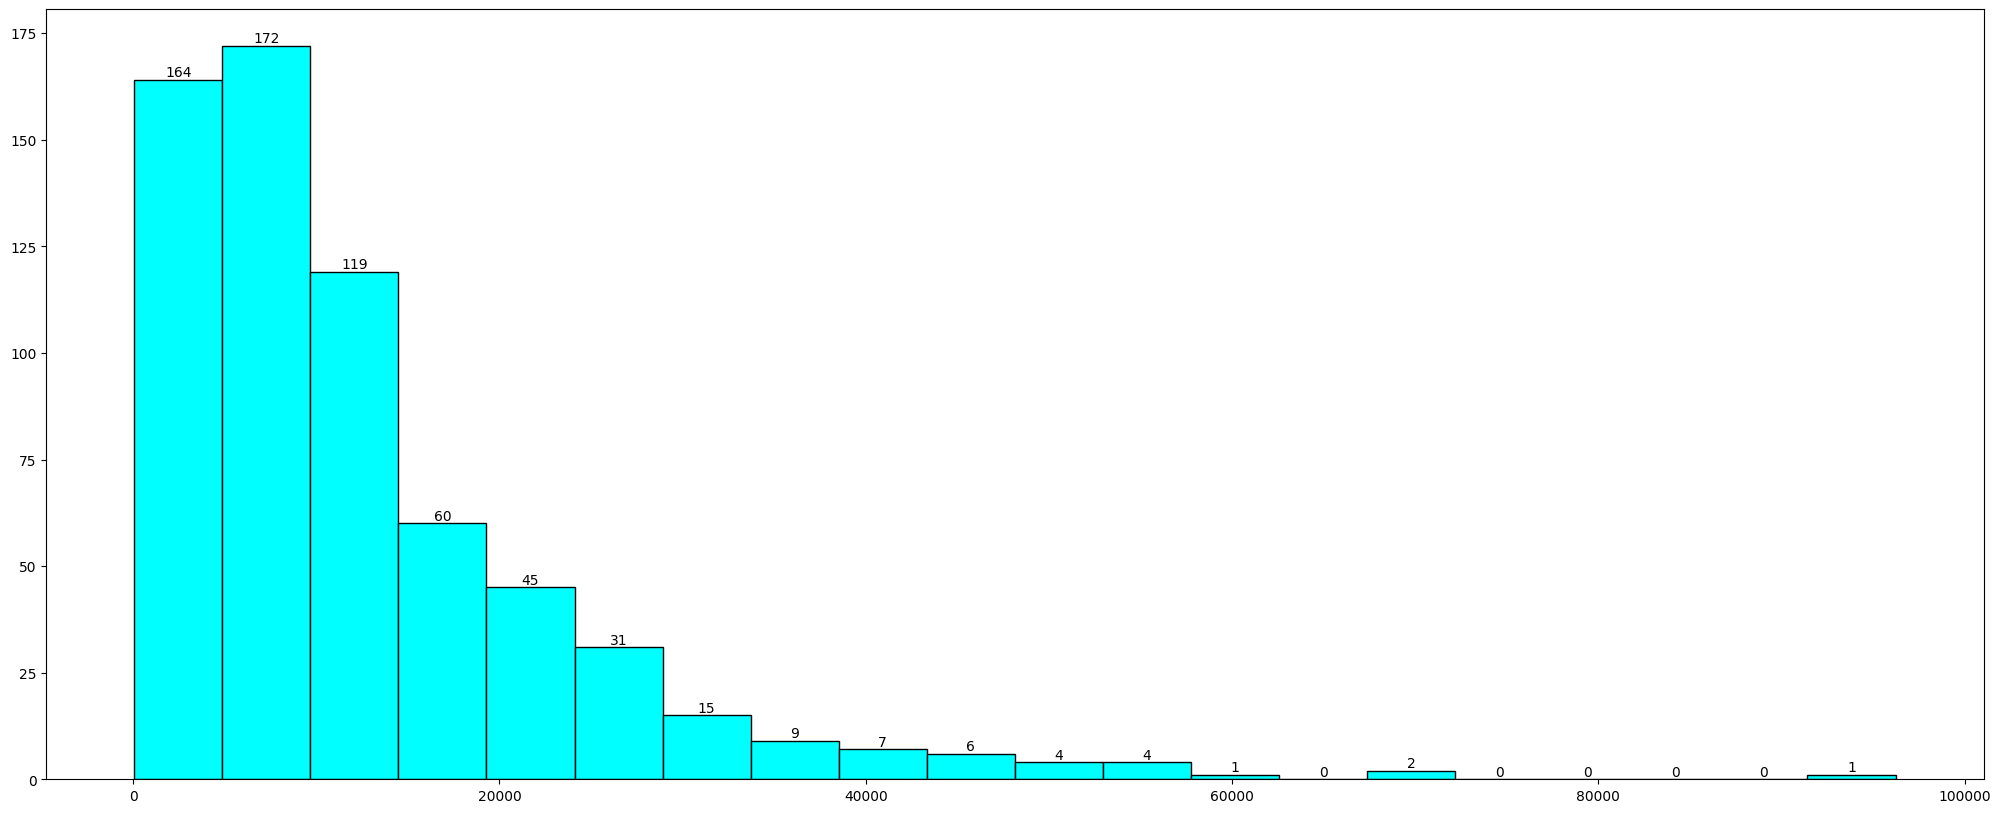

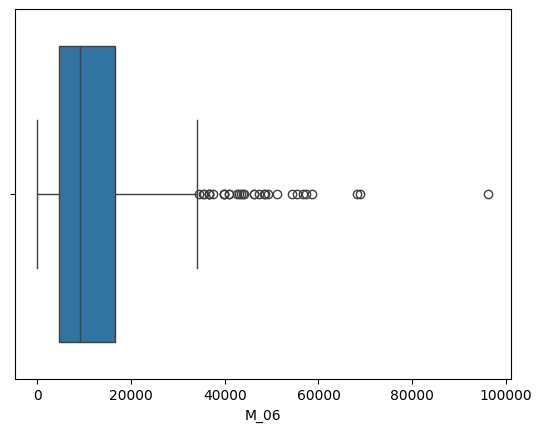

Description of F_06
----------------------------------------------------------------------------
count      640.000000
mean     11942.300000
std      11326.294567
min         56.000000
25%       4672.250000
50%       8663.000000
75%      15902.250000
max      95129.000000
Name: F_06, dtype: float64 Distribution of F_06
----------------------------------------------------------------------------
BoxPlot of F_06
----------------------------------------------------------------------------


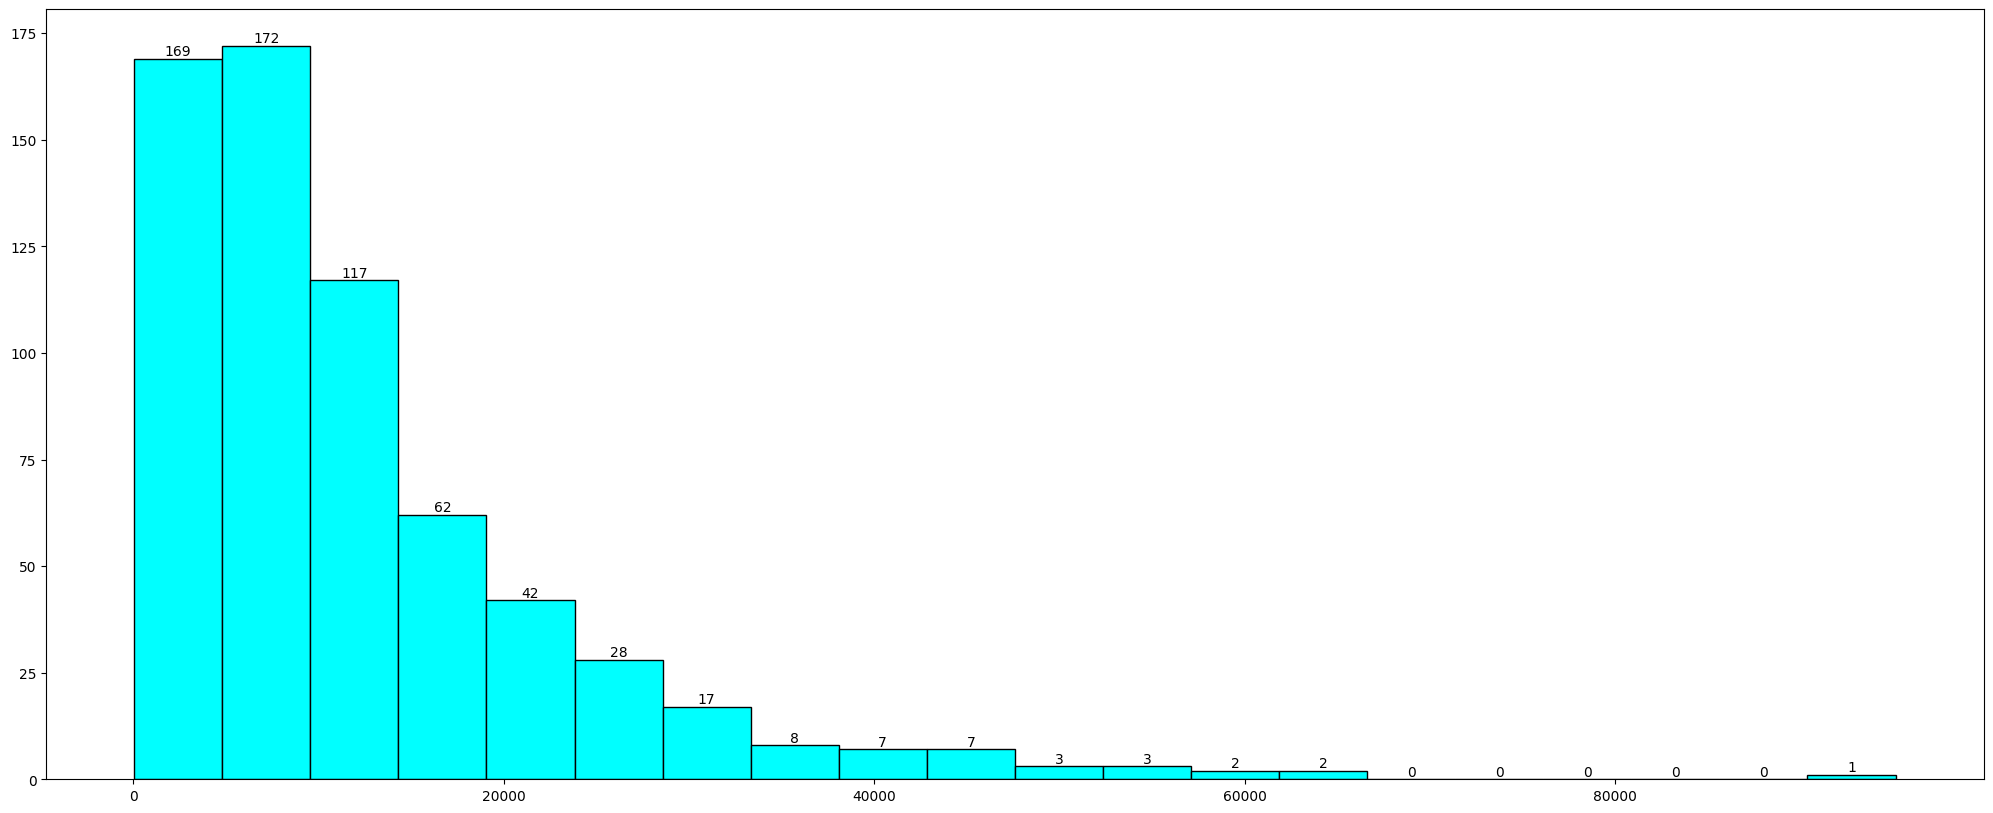

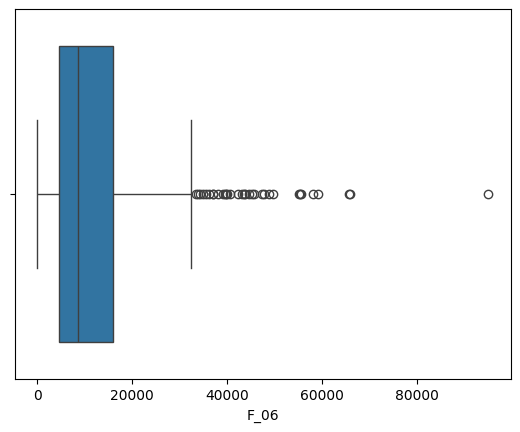

In [ ]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

##Observations

We have taken 5 variables as instructed as No_HH, TOT_M, TOT_F, M_06 and F_06

The mean of No_HH is 51222.871875, the least number of No_HH is 350 and maximum No_HH is 3L.

The average of male population is 79940 and female population is 122372.

The least number of male and female in the range of 0-6 is same i.e. 56. Their averages are also closed, 12309 for male and 11942 for female


##Bivariate Analysis

In [ ]:
corr = DF_5.corr(method='pearson')

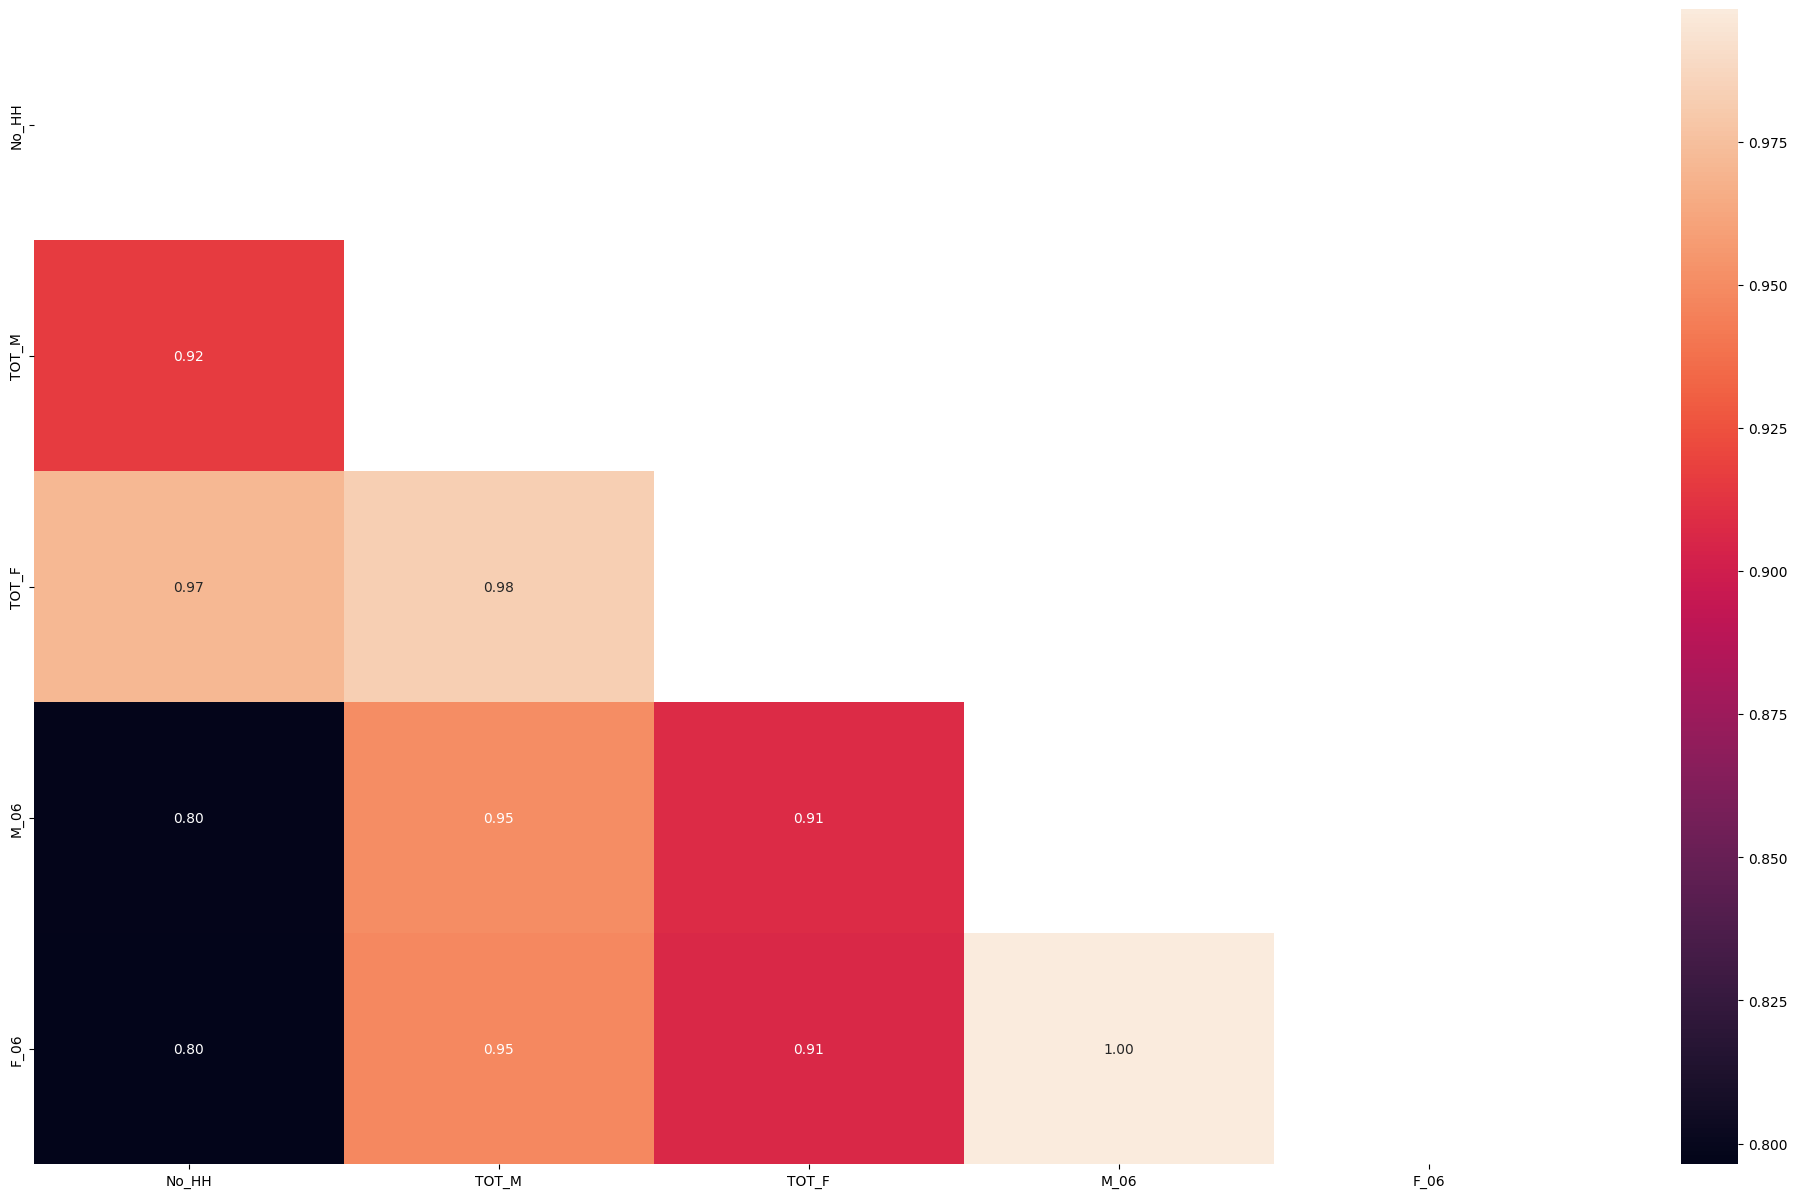

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))
fig = plt.subplots(figsize=(25, 15))
sn.heatmap(DF_5.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

##Observations

There is a strong corelation of Total number of female with total number of male and No. of household.

There is a corelation between total number of male and number of male in the range of age 0-6.

(i) Which state has highest gender ratio and which has the lowest?

In [ ]:
data1['Gender Ratio'] = (data1['TOT_M']/data1['TOT_F'])*100

In [ ]:
data1.groupby(['State'])['Gender Ratio'].sum().sort_values(ascending = False)

State
Uttar Pradesh               5413.293725
Madhya Pradesh              3177.569569
Bihar                       2835.917984
Rajasthan                   2268.909574
Maharashtra                 2013.783018
Karnataka                   1909.417872
Assam                       1851.294763
Tamil Nadu                  1734.258585
Gujarat                     1722.122683
Odisha                      1665.908566
Haryana                     1633.259007
Jharkhand                   1626.394206
Jammu & Kashmir             1601.629698
Punjab                      1495.686823
West Bengal                 1233.701685
Andhra Pradesh              1230.363581
Chhattisgarh                 967.383712
Arunachal Pradesh            914.807562
Kerala                       828.430783
Uttarakhand                  804.559743
Himachal Pradesh             754.534285
NCT of Delhi                 689.792445
Nagaland                     646.727566
Manipur                      577.392202
Meghalaya                    515.2

<Axes: xlabel='State'>

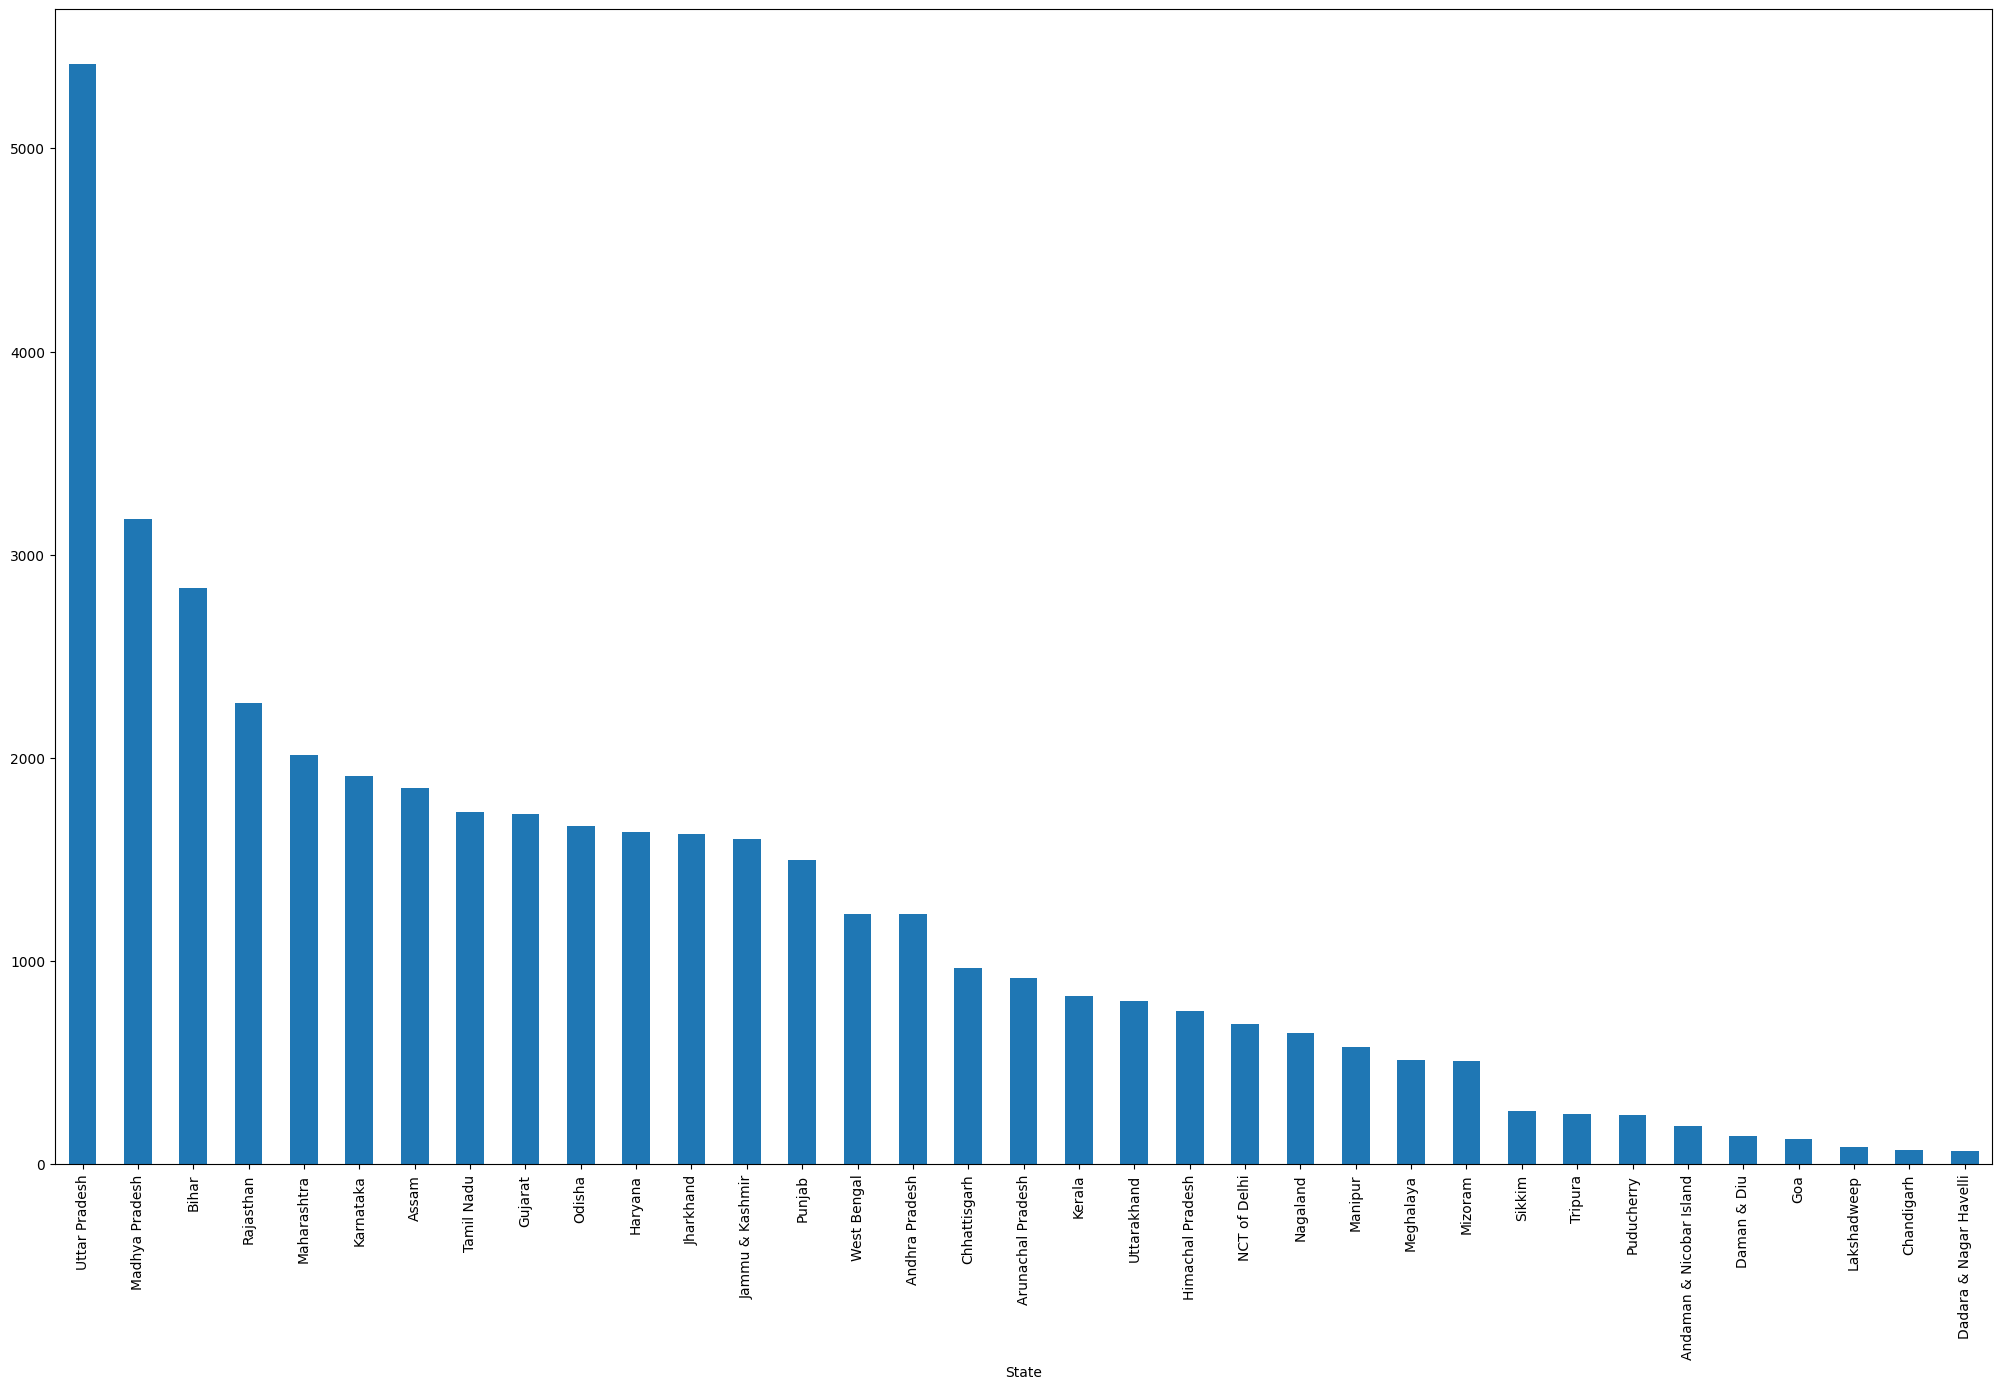

In [ ]:
fig, ax = plt.subplots(figsize=(25, 15))
data1.groupby(['State'])['Gender Ratio'].sum().sort_values(ascending = False).plot(kind='bar', ax=ax)

(ii) Which district has the highest & lowest gender ratio?

In [ ]:
##fig, ax = plt.subplots(figsize=(25, 15))
data1.groupby(['State','Area Name'])['Gender Ratio'].sum().sort_values(ascending = False)

State            Area Name     
Lakshadweep      Lakshadweep       86.806120
Jammu & Kashmir  Badgam            84.776210
Uttar Pradesh    Mahamaya Nagar    84.731286
Rajasthan        Dhaulpur          84.691142
Uttar Pradesh    Baghpat           84.400265
                                     ...    
Odisha           Baudh             45.145505
Andhra Pradesh   West Godavari     45.007568
Tamil Nadu       Virudhunagar      44.935161
Odisha           Koraput           44.076873
Andhra Pradesh   Krishna           43.797226
Name: Gender Ratio, Length: 640, dtype: float64

##Observations

It is observed that State Uttar Pradesh has the highest gender ratio and Dadara & Nagar Havelli has the lowest geneder ratio

It is observed that district code 587 Lakshadweep has the highest gender ratio and District code 547 Krishna of State Andhra Pradesh has the lowest gender ratio

##Problem 2 - Data Preprocessing

Observations

There are no missing values present in data.

##Let's check the outliers for each column in the data

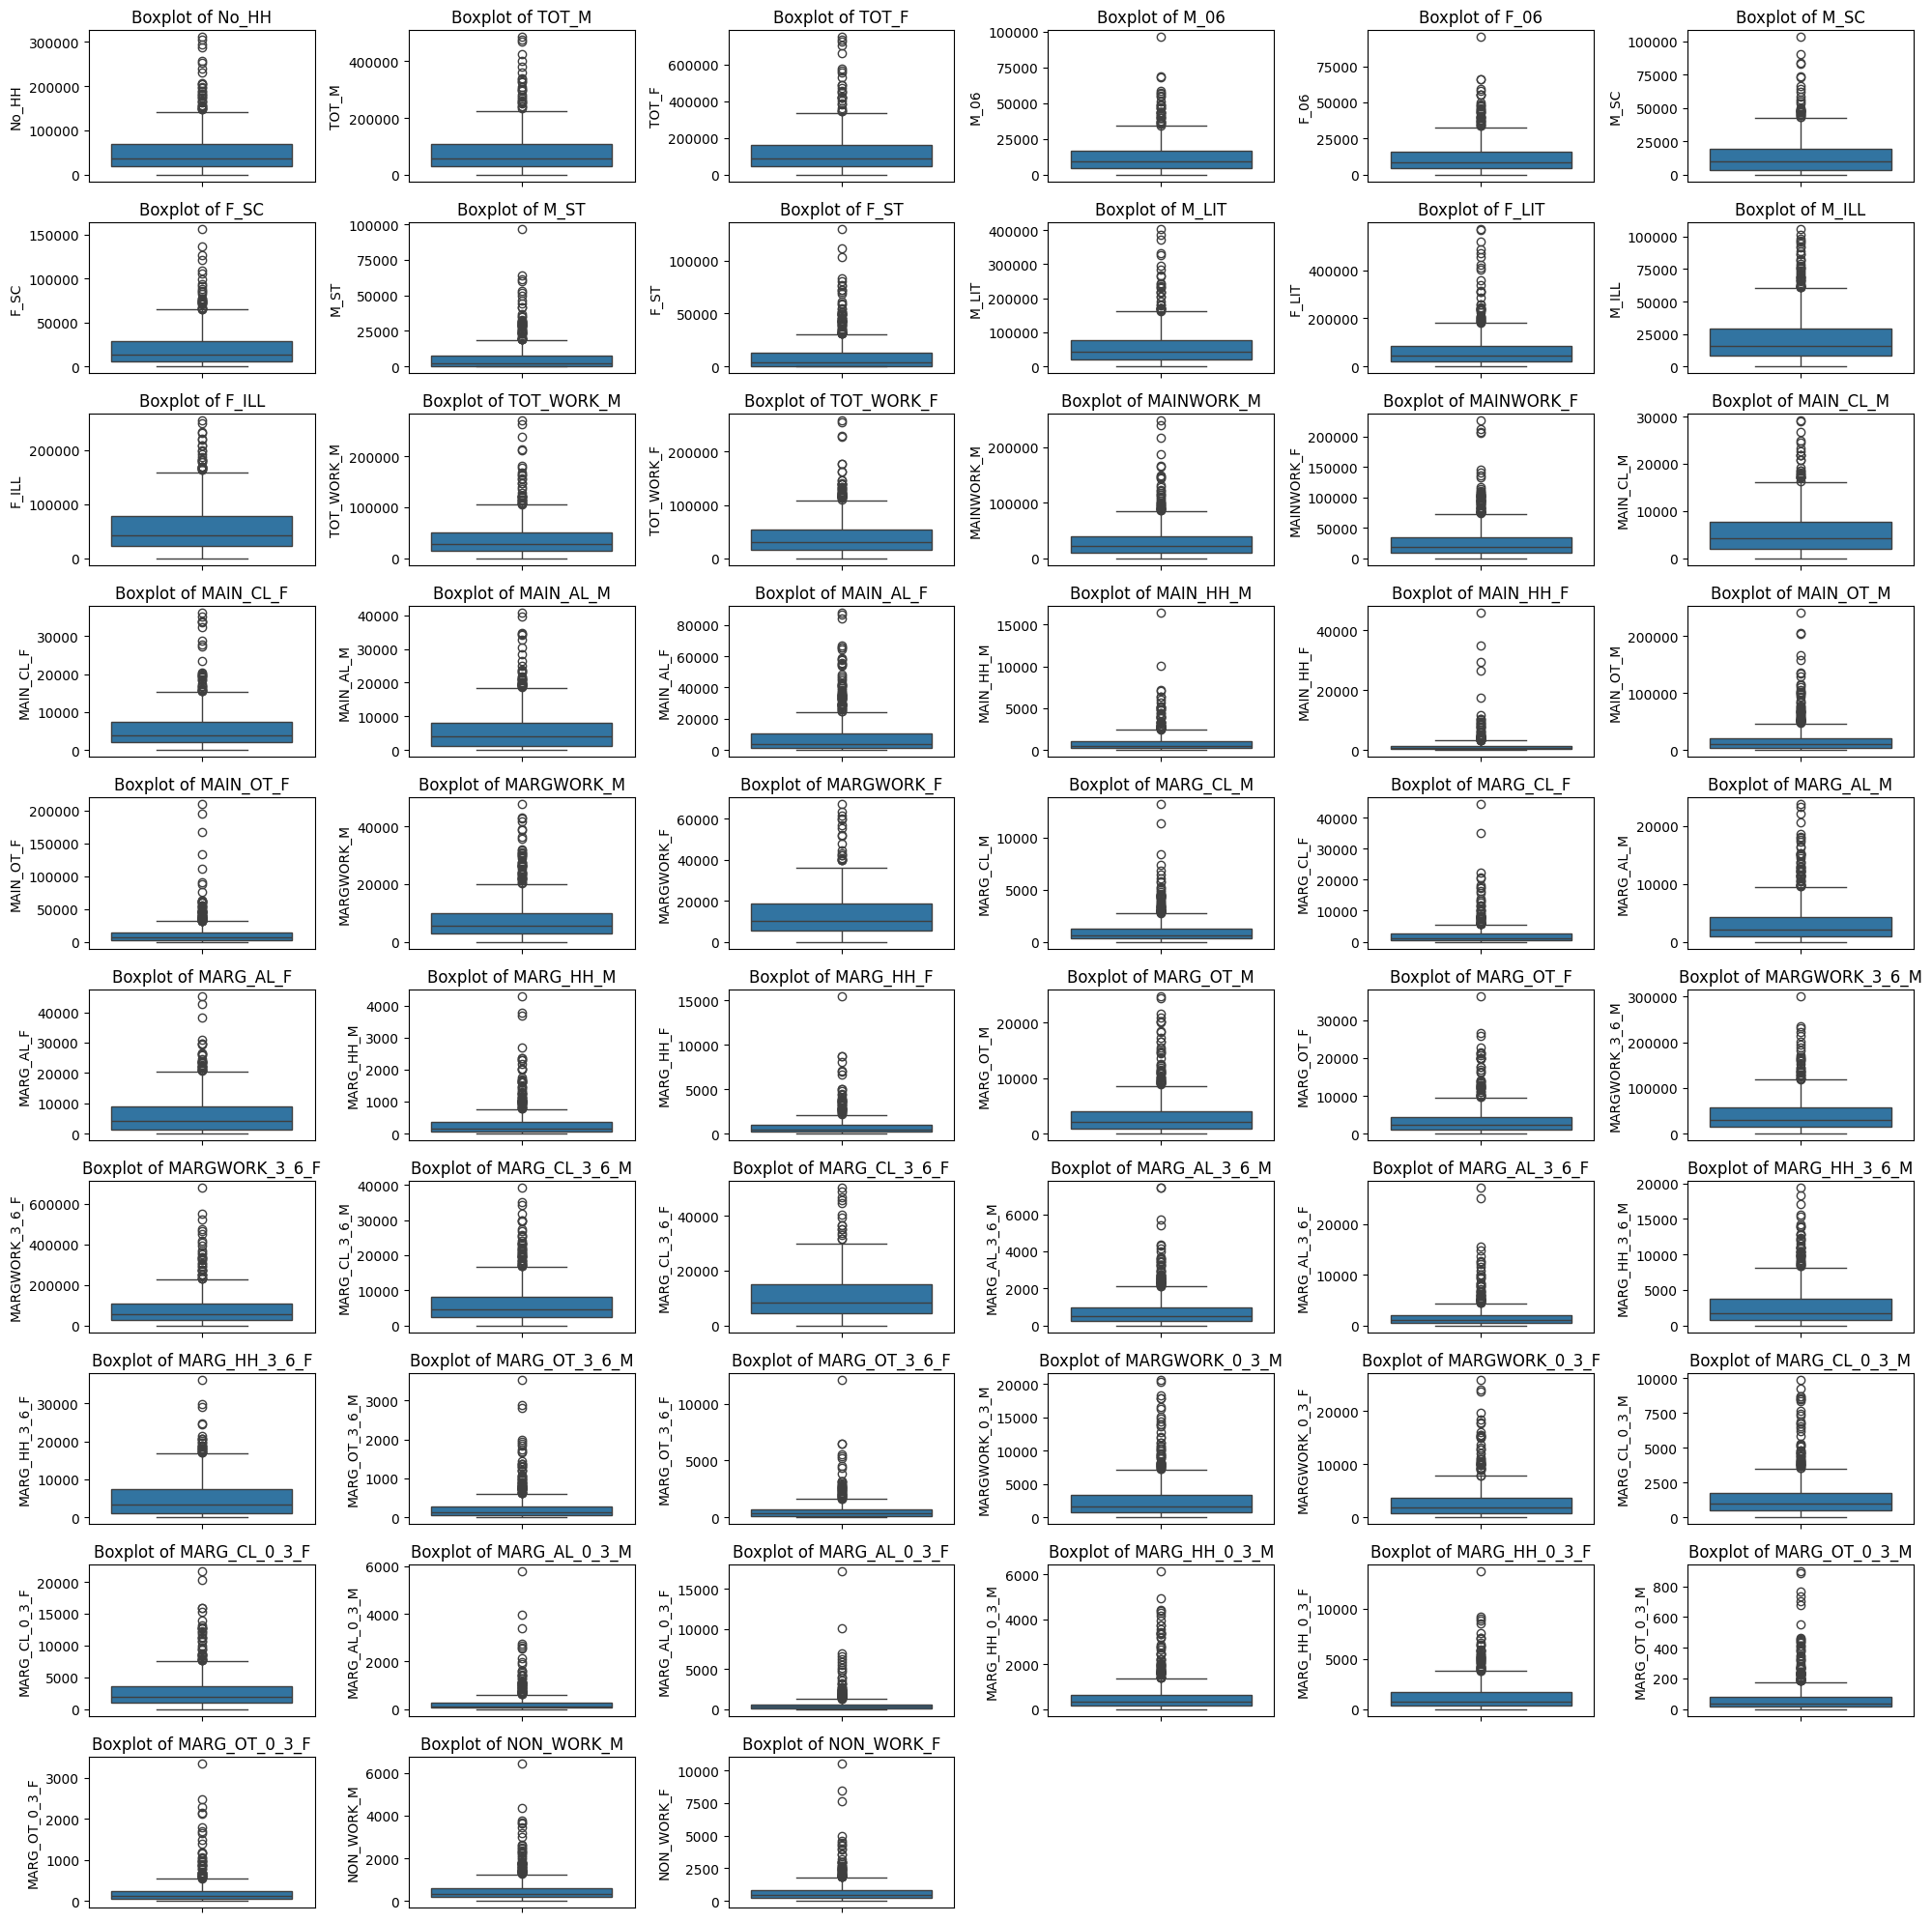

In [ ]:
plt.figure(figsize = (20,20))
feature_list = DF.columns
for i in range(len(feature_list)):
    plt.subplot(10, 6, i + 1)
    sn.boxplot(y = DF[feature_list[i]], data = DF)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [ ]:
from sklearn.preprocessing import StandardScaler

#importing PCA
from sklearn.decomposition import PCA

In [ ]:
# scaling the data
from scipy.stats import zscore
df_scaled=DF.apply(zscore)
df_scaled.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,-0.476423,-0.798097,...,-0.163229,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614
1,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,-0.607607,-0.849434,...,-0.583103,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988
2,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,-0.027273,-0.956457,...,-0.859212,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839
3,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,-0.390060,-1.004643,...,-0.805468,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038
4,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,0.043330,-0.800568,...,-0.348645,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344


In [ ]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
No_HH,640.0,4.440892e-17,1.000782,-1.057697,-0.659882,-0.319887,0.367358,5.389586
TOT_M,640.0,-8.881784e-17,1.000782,-1.084858,-0.677956,-0.294592,0.381549,5.529690
TOT_F,640.0,-4.440892e-17,1.000782,-1.071906,-0.668250,-0.305233,0.368945,5.532633
M_06,640.0,-5.551115e-17,1.000782,-1.066236,-0.659189,-0.274114,0.366445,7.301993
F_06,640.0,6.661338e-17,1.000782,-1.050264,-0.642376,-0.289756,0.349898,7.350309
M_SC,640.0,5.551115e-18,1.000782,-0.958783,-0.718323,-0.293404,0.389092,6.207800
F_SC,640.0,-5.551115e-17,1.000782,-0.957049,-0.698964,-0.325615,0.386976,6.248040
M_ST,640.0,-4.440892e-17,1.000782,-0.625124,-0.595467,-0.389534,0.148027,9.146281
F_ST,640.0,-2.220446e-17,1.000782,-0.640197,-0.613122,-0.398476,0.146540,7.562324
M_LIT,640.0,-4.440892e-17,1.000782,-1.032495,-0.656385,-0.273410,0.358381,6.180672


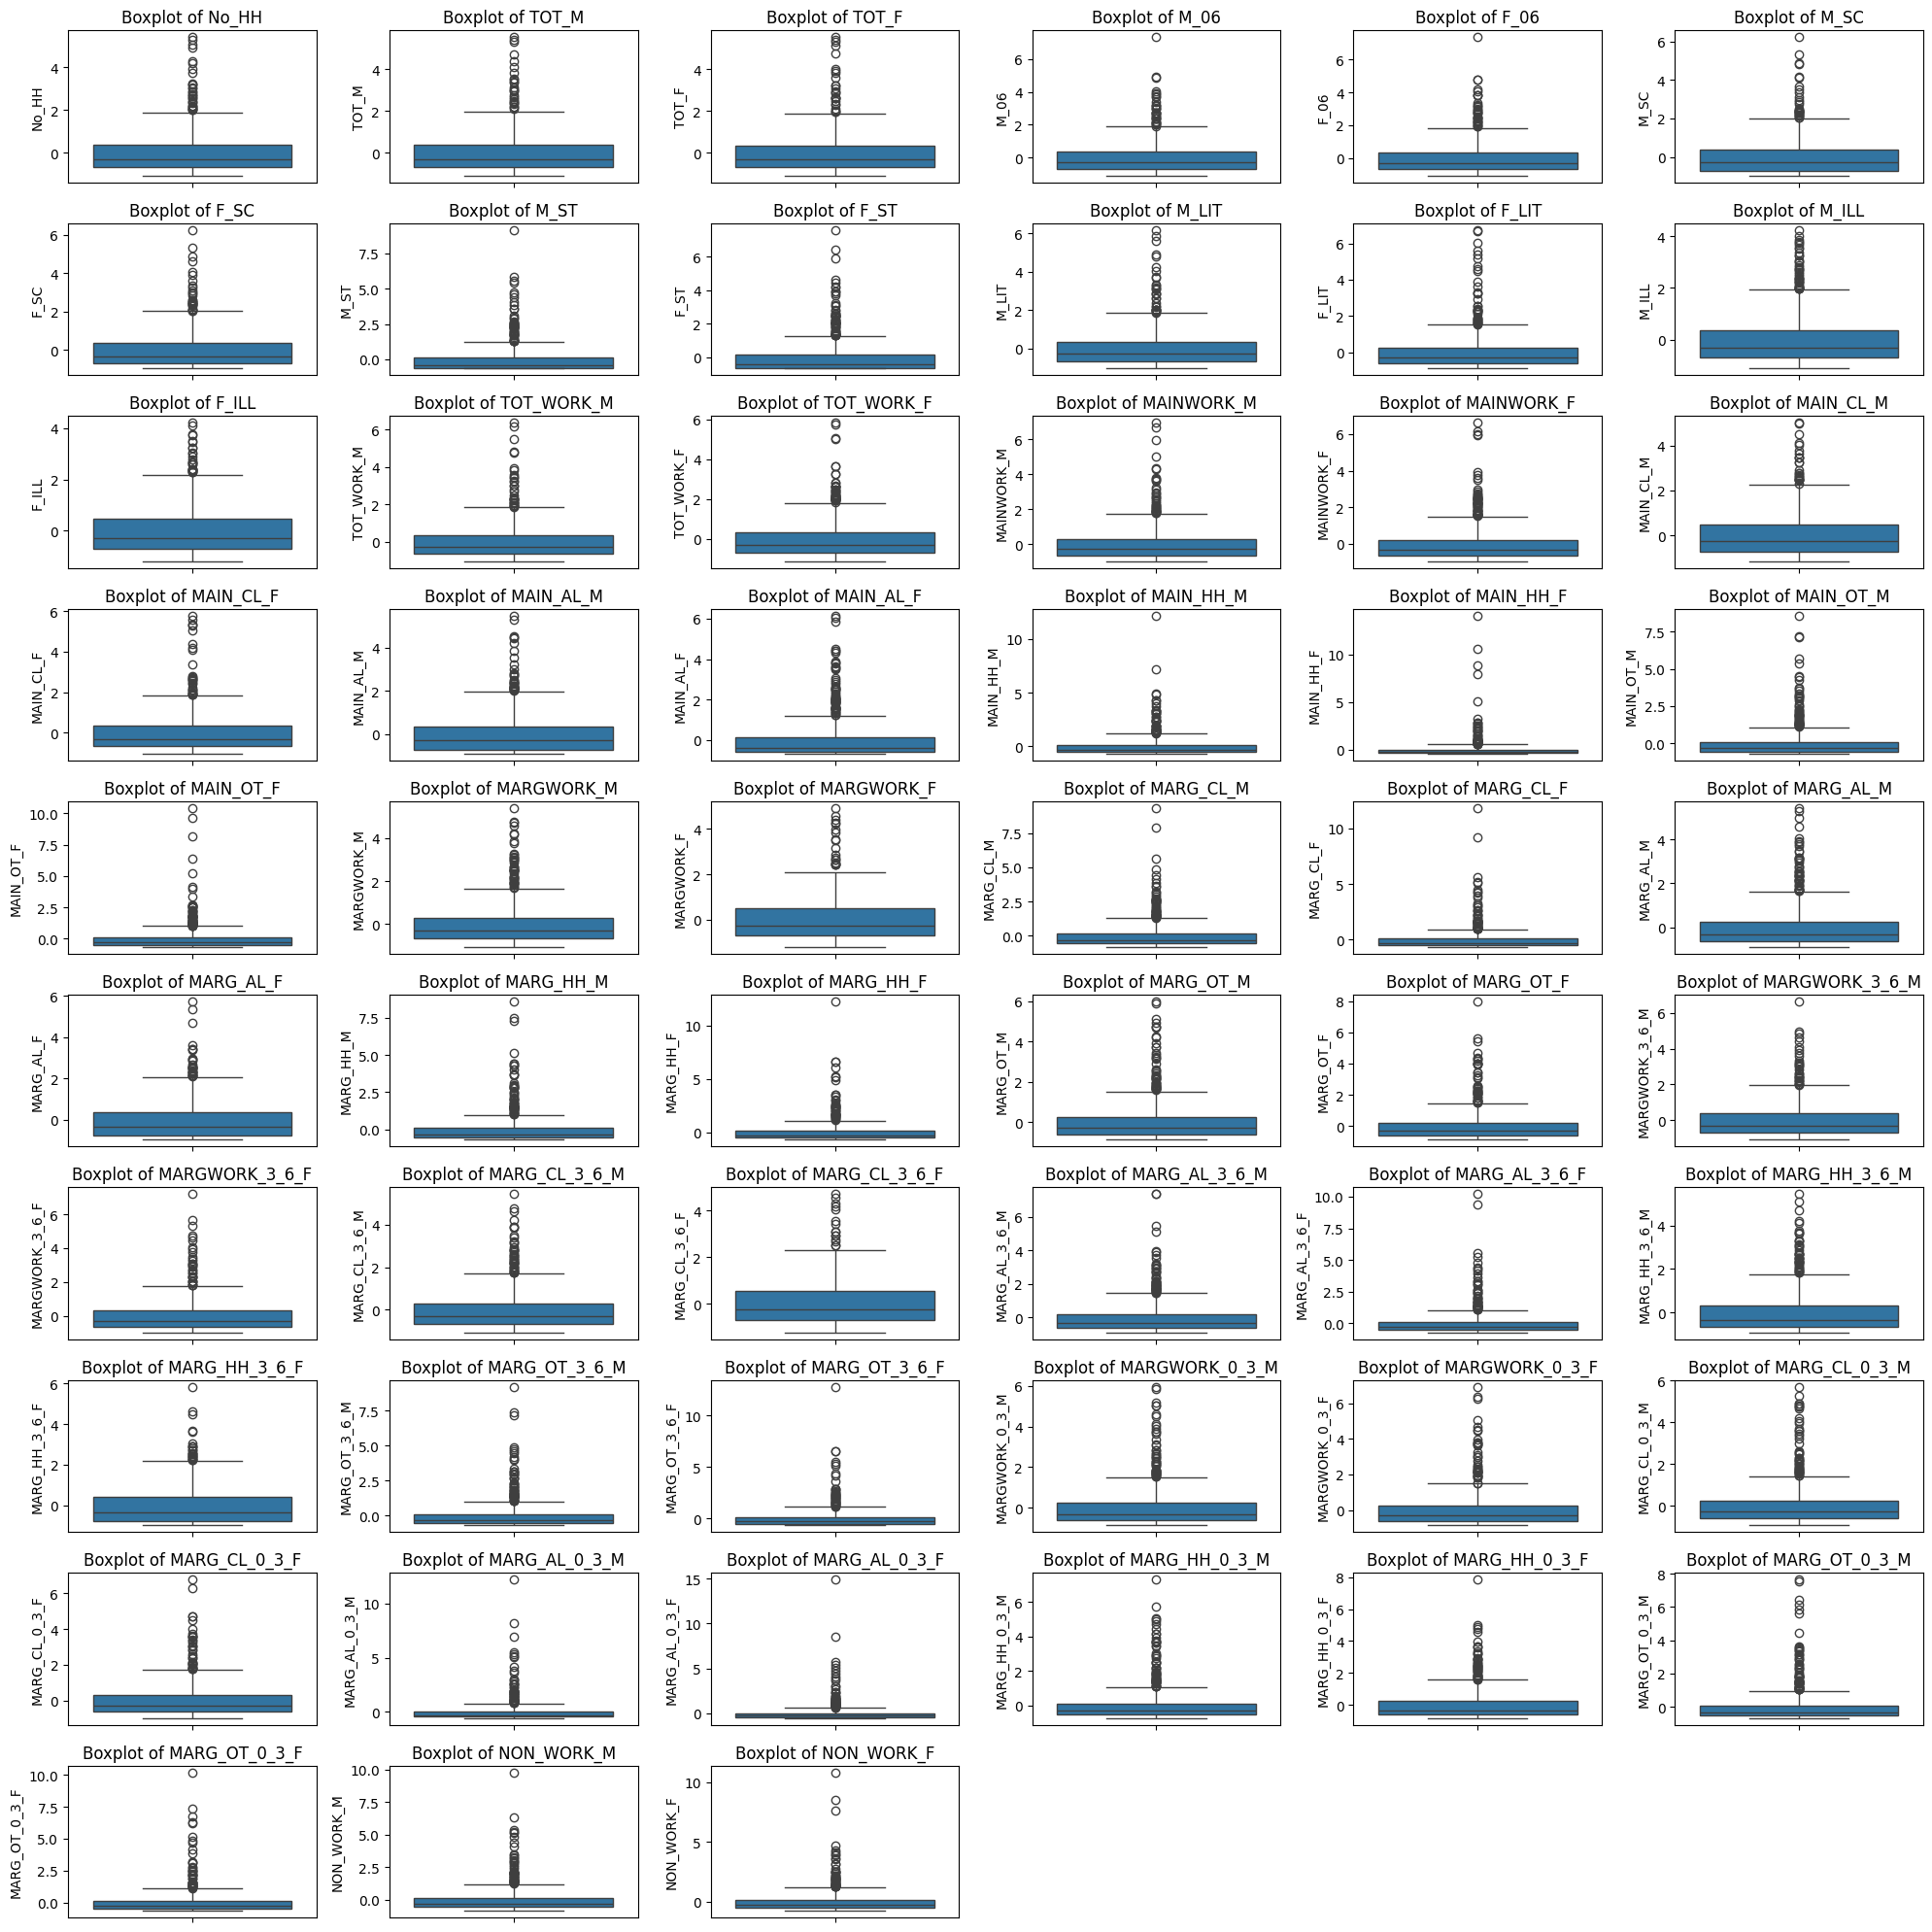

In [ ]:
plt.figure(figsize = (20,20))
feature_list = df_scaled.columns
for i in range(len(feature_list)):
    plt.subplot(10, 6, i + 1)
    sn.boxplot(y = df_scaled[feature_list[i]], data = df_scaled)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

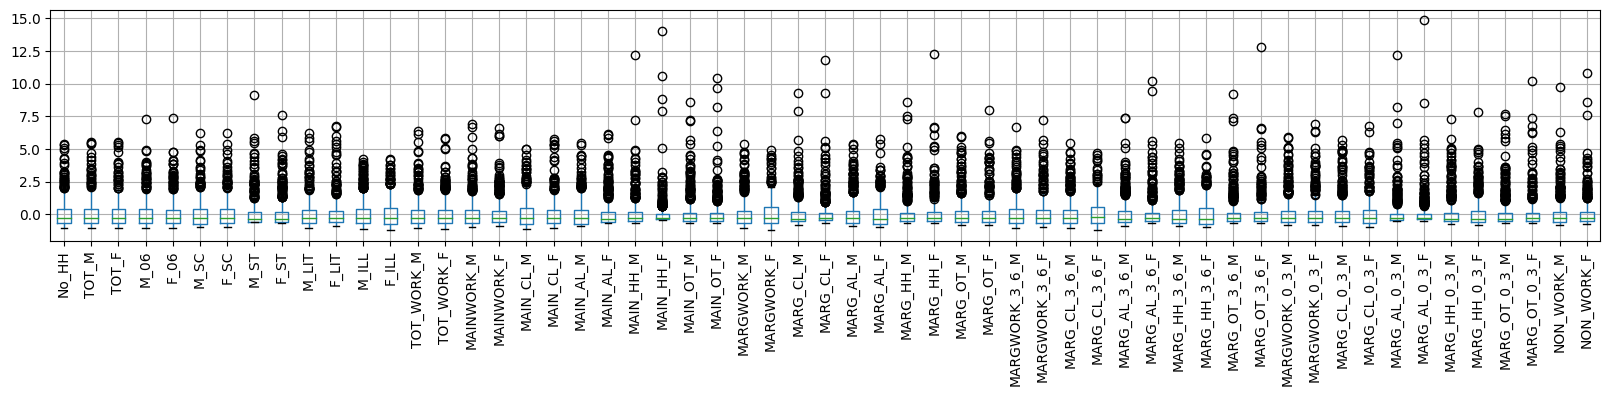

In [ ]:
df_scaled.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

##Principal Component Analysis

### Statistical tests to be done before PCA

Bartletts Test of Sphericity
Bartlett's test of sphericity tests the hypothesis that the variables are uncorrelated in the population.

H0: All variables in the data are uncorrelated

Ha: At least one pair of variables in the data are correlated

If the null hypothesis cannot be rejected, then PCA is not advisable.

If the p-value is small, then we can reject the null hypothesis and agree that there is atleast one pair of vairbales in the data wihich are correlated hence PCA is recommended.

In [ ]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=6479c5657e043678d5b8f5c5d41f0fe5a88969f655f410b7c32897efba9b6351
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_scaled)
p_value

0.0

Since P value is lesser then alternate hypothesis is accepted.

KMO Test
The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is.

Generally, if MSA is less than 0.5, PCA is not recommended, since no reduction is expected. On the other hand, MSA > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_scaled)
kmo_model

0.8039889932781807

Since MSA value is higher than 0.7 then proceed with PCA

In [ ]:
df_scaled.shape

(640, 57)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=57, random_state=123)
df_pca = pca.fit_transform(df_scaled)
df_pca.transpose().round(2)

array([[-4.62, -4.77, -5.96, ..., -6.29, -6.22, -5.9 ],
       [ 0.14, -0.11, -0.29, ..., -0.64, -0.67, -0.94],
       [ 0.33,  0.24,  0.37, ...,  0.11,  0.27,  0.35],
       ...,
       [ 0.  ,  0.  , -0.  , ..., -0.  , -0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ..., -0.  ,  0.  , -0.  ],
       [ 0.  , -0.  , -0.  , ...,  0.  ,  0.  , -0.  ]])

In [ ]:
#Step 1: Obtaining the Eigen Vectors when the Principal Components are kept exactly as the number of features in the scaled data
print('Eigen Vectors \n %s',pca.components_.round(2))

Eigen Vectors 
 %s [[ 0.16  0.17  0.17 ...  0.13  0.15  0.13]
 [-0.13 -0.09 -0.1  ...  0.05 -0.07 -0.07]
 [-0.    0.06  0.04 ... -0.08  0.11  0.1 ]
 ...
 [ 0.    0.38  0.15 ...  0.03 -0.08 -0.03]
 [-0.    0.24  0.09 ... -0.03 -0.02  0.04]
 [-0.   -0.09 -0.01 ...  0.01 -0.01 -0.  ]]


In [ ]:
var_exp = pca.explained_variance_ratio_
print(var_exp.round(2))

[0.56 0.14 0.07 0.06 0.04 0.03 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.  ]


In [ ]:
# Step 2: Obtaining the Cumulative Sum of the Expalained Variance
cum_var_exp = np.cumsum(var_exp)
print('Cumulative Variance Explained in Percentage:\n\n',(cum_var_exp*100).round(2))

Cumulative Variance Explained in Percentage:

 [ 55.73  69.51  76.79  83.21  87.08  90.47  92.53  93.85  94.93  95.85
  96.61  97.23  97.75  98.24  98.57  98.81  99.01  99.2   99.37  99.51
  99.61  99.69  99.75  99.81  99.85  99.89  99.92  99.94  99.96  99.97
  99.98  99.99 100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.  ]



We can see above that more than 90% of the variance is explained by 6 Principal Components.

Around 93% of the variance is explained by 7 Principal Components.

Around 97% of the variance is explained by 11 Principal Components.

##Scree plot

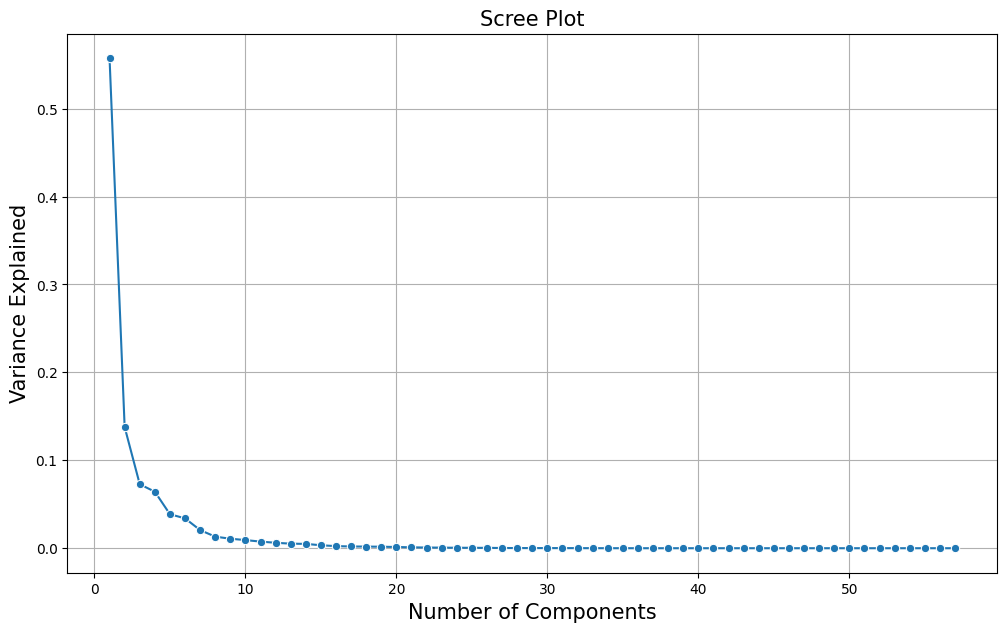

In [ ]:
# Step 3 View Scree Plot to identify the number of components to be built
plt.figure(figsize=(12,7))
sn.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

The number of components can be decided based upon the explained variance. Here, it is decided to keep the number of components as 6 as the cumulative explained variance is around 90%

In [ ]:
# Step 4 Apply PCA for the number of decided components to get the loadings and component output

# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA
# NOTE - we are generating only 6 PCA dimensions (dimensionality reduction from 57 to 6)
pca = PCA(n_components=6, random_state=123)
df_pca = pca.fit_transform(df_scaled)
df_pca.transpose().round(2) # Component output

array([[-4.62, -4.77, -5.96, ..., -6.29, -6.22, -5.9 ],
       [ 0.14, -0.11, -0.29, ..., -0.64, -0.67, -0.94],
       [ 0.33,  0.24,  0.37, ...,  0.11,  0.27,  0.35],
       [ 1.54,  1.96,  0.62, ...,  1.37,  1.14,  1.11],
       [ 0.35, -0.15,  0.48, ...,  0.15,  0.06,  0.15],
       [-0.42,  0.42,  0.28, ...,  0.14, -0.12, -0.15]])

In [ ]:
df_pca.shape

(640, 6)

In [ ]:
# Loading of each feature on the components
# Eigen Vectors when PC's are kept as 6
pca.components_.round(2)

array([[ 0.16,  0.17,  0.17,  0.16,  0.16,  0.15,  0.15,  0.03,  0.03,
         0.16,  0.15,  0.16,  0.17,  0.16,  0.15,  0.15,  0.12,  0.1 ,
         0.07,  0.11,  0.07,  0.13,  0.08,  0.12,  0.11,  0.16,  0.16,
         0.08,  0.05,  0.13,  0.11,  0.14,  0.13,  0.16,  0.15,  0.16,
         0.16,  0.17,  0.16,  0.09,  0.05,  0.13,  0.11,  0.14,  0.12,
         0.15,  0.15,  0.15,  0.14,  0.05,  0.04,  0.12,  0.12,  0.14,
         0.13,  0.15,  0.13],
       [-0.13, -0.09, -0.1 , -0.02, -0.02, -0.05, -0.05,  0.03,  0.03,
        -0.12, -0.15, -0.01, -0.01, -0.13, -0.09, -0.18, -0.15,  0.06,
         0.09, -0.03, -0.06, -0.08, -0.08, -0.21, -0.21,  0.09,  0.13,
         0.27,  0.25,  0.17,  0.14,  0.07,  0.02, -0.09, -0.12, -0.04,
        -0.11,  0.08,  0.1 ,  0.26,  0.24,  0.16,  0.13,  0.06,  0.01,
        -0.09, -0.13,  0.15,  0.18,  0.25,  0.24,  0.19,  0.18,  0.08,
         0.05, -0.07, -0.07],
       [-0.  ,  0.06,  0.04,  0.06,  0.05,  0.  , -0.03, -0.12, -0.14,
         0.08,  0

In [ ]:
var_exp_1 = pca.explained_variance_ratio_.round(2)

In [ ]:
var_exp_1

array([0.56, 0.14, 0.07, 0.06, 0.04, 0.03])

In [ ]:
#Check the explained variance for each PC.
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
# It gives the Eigen Values when PC's are kept at 6
pca.explained_variance_ratio_.round(2)

array([0.56, 0.14, 0.07, 0.06, 0.04, 0.03])

In [ ]:
cum_var_exp_1 = np.cumsum(var_exp_1)
print('Cumulative Variance Explained in Percentage:\n\n',(cum_var_exp_1*100).round(2))

Cumulative Variance Explained in Percentage:

 [56. 70. 77. 83. 87. 90.]


Let's create a dataframe of component loading against each field and identify the pattern

In [ ]:
# Component loading when PC's are kept as 6
df_pca_loading = pd.DataFrame(pca.components_.round(2),columns=list(df_scaled))
df_pca_loading.shape

(6, 57)

In [ ]:
df_pca_loading.head().T

,0,1,2,3,4
No_HH,0.16,-0.13,-0.00,-0.13,-0.01
TOT_M,0.17,-0.09,0.06,-0.02,-0.03
TOT_F,0.17,-0.10,0.04,-0.07,-0.01
M_06,0.16,-0.02,0.06,0.01,-0.05
F_06,0.16,-0.02,0.05,0.01,-0.04
M_SC,0.15,-0.05,0.00,0.01,-0.17
F_SC,0.15,-0.05,-0.03,-0.03,-0.16
M_ST,0.03,0.03,-0.12,-0.22,0.43
F_ST,0.03,0.03,-0.14,-0.23,0.44
M_LIT,0.16,-0.12,0.08,-0.04,-0.01


Let's identify which features have maximum loading across the components.

We will first plot the component loading on a heatmap.

For each feature, we find the maximum loading value across the components and mark the same with help of rectangular box.

Features marked with rectangular red box are the one having maximum loading on the respective component. We consider these marked features to decide the context that the component represents

In [ ]:
from matplotlib.patches import Rectangle

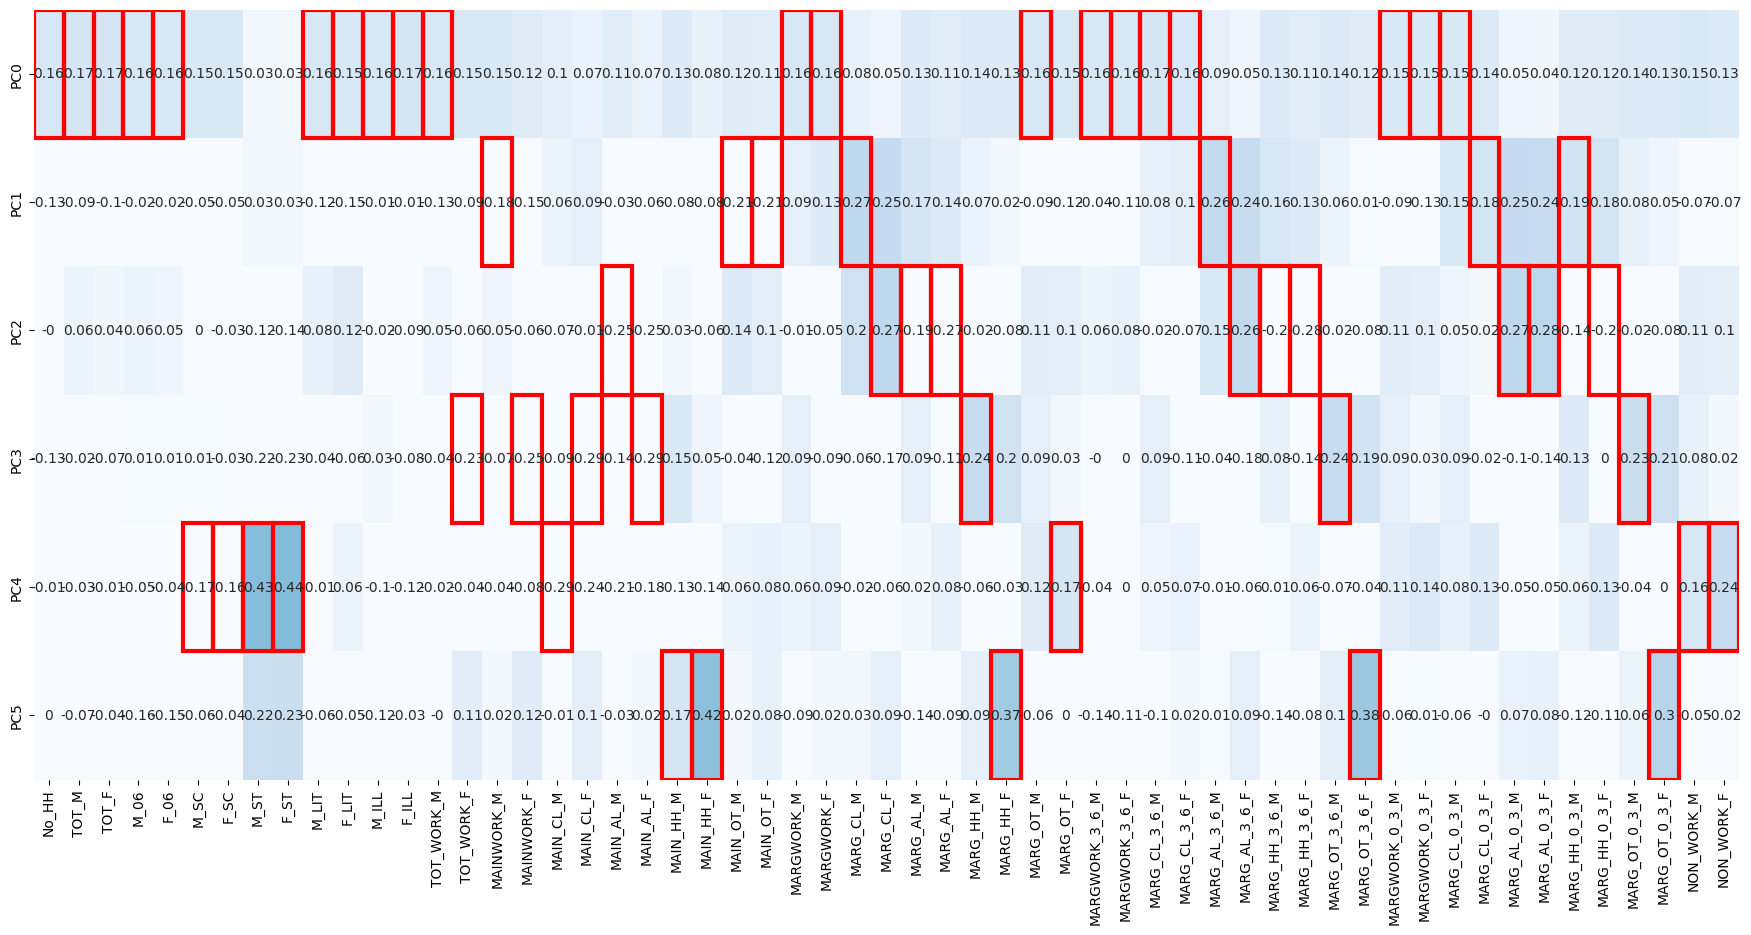

In [ ]:
fig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sn.heatmap(df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC0','PC1','PC2','PC3','PC4','PC5'])

column_max = df_pca_loading.abs().idxmax(axis=0)

for col, variable in enumerate(df_pca_loading.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

##For every attribute (column, the corresponding PC's cell with the maximum magnitude has been highlighted using Rectangles.

For Example, for the No_HH attribute, the PC0 has the maximum magnitude of 0.16

In [ ]:
df_pca = pd.DataFrame(df_pca.round(2),columns=['PCA0','PCA1','PCA2','PCA3','PCA4','PCA5'])
df_pca.head(20)

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5
0,-4.62,0.14,0.33,1.54,0.35,-0.42
1,-4.77,-0.11,0.24,1.96,-0.15,0.42
2,-5.96,-0.29,0.37,0.62,0.48,0.28
3,-6.28,-0.50,0.21,1.07,0.30,0.05
4,-4.48,0.89,1.08,0.54,0.80,0.34
5,-3.32,2.82,3.06,-0.45,0.74,0.63
6,-5.02,-0.35,0.65,0.98,-0.06,-0.25
7,-4.61,0.02,0.40,1.58,0.17,-0.14
8,-5.19,-0.06,0.18,1.74,0.17,0.46
9,-4.23,-1.34,0.70,1.47,0.27,-0.00


In [ ]:
for i in range(0,57):
  print("(",np.round(pca.components_[0][1],2),")",'*',df_scaled.columns[i],end='+')

( 0.17 ) * No_HH+( 0.17 ) * TOT_M+( 0.17 ) * TOT_F+( 0.17 ) * M_06+( 0.17 ) * F_06+( 0.17 ) * M_SC+( 0.17 ) * F_SC+( 0.17 ) * M_ST+( 0.17 ) * F_ST+( 0.17 ) * M_LIT+( 0.17 ) * F_LIT+( 0.17 ) * M_ILL+( 0.17 ) * F_ILL+( 0.17 ) * TOT_WORK_M+( 0.17 ) * TOT_WORK_F+( 0.17 ) * MAINWORK_M+( 0.17 ) * MAINWORK_F+( 0.17 ) * MAIN_CL_M+( 0.17 ) * MAIN_CL_F+( 0.17 ) * MAIN_AL_M+( 0.17 ) * MAIN_AL_F+( 0.17 ) * MAIN_HH_M+( 0.17 ) * MAIN_HH_F+( 0.17 ) * MAIN_OT_M+( 0.17 ) * MAIN_OT_F+( 0.17 ) * MARGWORK_M+( 0.17 ) * MARGWORK_F+( 0.17 ) * MARG_CL_M+( 0.17 ) * MARG_CL_F+( 0.17 ) * MARG_AL_M+( 0.17 ) * MARG_AL_F+( 0.17 ) * MARG_HH_M+( 0.17 ) * MARG_HH_F+( 0.17 ) * MARG_OT_M+( 0.17 ) * MARG_OT_F+( 0.17 ) * MARGWORK_3_6_M+( 0.17 ) * MARGWORK_3_6_F+( 0.17 ) * MARG_CL_3_6_M+( 0.17 ) * MARG_CL_3_6_F+( 0.17 ) * MARG_AL_3_6_M+( 0.17 ) * MARG_AL_3_6_F+( 0.17 ) * MARG_HH_3_6_M+( 0.17 ) * MARG_HH_3_6_F+( 0.17 ) * MARG_OT_3_6_M+( 0.17 ) * MARG_OT_3_6_F+( 0.17 ) * MARGWORK_0_3_M+( 0.17 ) * MARGWORK_0_3_F+( 0.17 ) * MA

In [ ]:
df_pca.shape

(640, 6)

In [ ]:
df_new = pd.concat([DF1, df_pca], axis=1)

In [ ]:
df_new.shape

(640, 10)

In [ ]:
df_new.head()

,State Code,Dist.Code,State,Area Name,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5
0,1,1,Jammu & Kashmir,Kupwara,-4.62,0.14,0.33,1.54,0.35,-0.42
1,1,2,Jammu & Kashmir,Badgam,-4.77,-0.11,0.24,1.96,-0.15,0.42
2,1,3,Jammu & Kashmir,Leh(Ladakh),-5.96,-0.29,0.37,0.62,0.48,0.28
3,1,4,Jammu & Kashmir,Kargil,-6.28,-0.50,0.21,1.07,0.30,0.05
4,1,5,Jammu & Kashmir,Punch,-4.48,0.89,1.08,0.54,0.80,0.34


In [ ]:
df_new.describe()

,State Code,Dist.Code,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,17.114062,320.500000,0.000297,-0.000094,-0.000172,-0.000031,-0.000047,-0.000313
std,9.426486,184.896367,5.640273,2.805428,2.038035,1.915459,1.485695,1.392348
min,1.000000,1.000000,-6.570000,-15.010000,-7.720000,-7.220000,-4.610000,-7.610000
25%,9.000000,160.750000,-3.815000,-1.102500,-0.892500,-0.840000,-0.740000,-0.480000
50%,18.000000,320.500000,-1.605000,-0.280000,0.050000,0.380000,-0.085000,-0.035000
75%,24.000000,480.250000,2.500000,1.052500,0.532500,1.032500,0.530000,0.382500
max,35.000000,640.000000,26.280000,18.290000,17.780000,10.930000,7.890000,14.810000


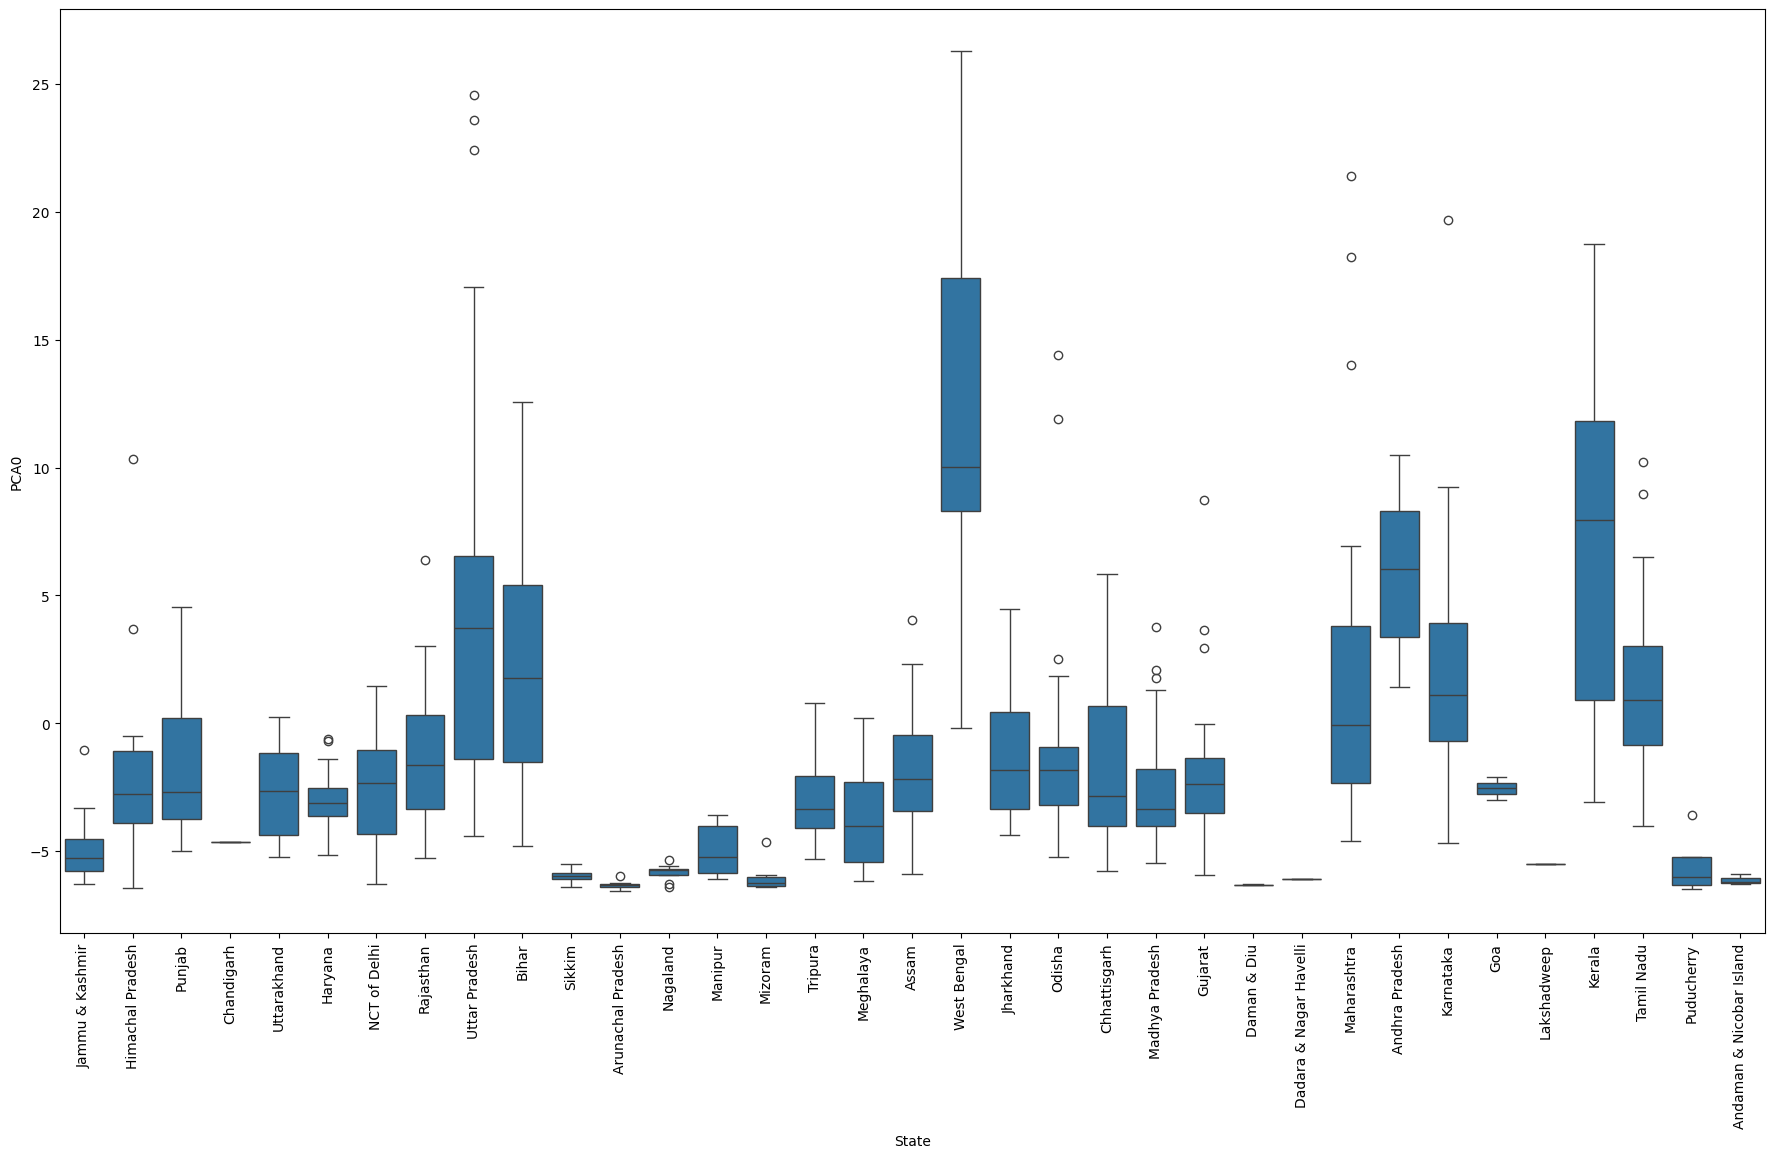

In [ ]:
fig,ax = plt.subplots(figsize=(22,12))
sn.boxplot(x='State',y='PCA0', data=df_new)
plt.xticks(rotation=90)
plt.show()